# CSE 544 PROJECT

## Team Members:

Priyanka Datar           

Jayakrishna Anvesh Paidy 

Ujwal Vemula             

Shikha Dixit             

Eesha Gitay              


# Tasks

### 1. Clean your dataset (remove missing values, sanitize data, etc.). Remove any outliers using the Tukey’s rule from class. Report what you found (number of outliers). Comment on your findings both for data cleaning (what issues you found, how you dealt with them) and outlier detection. This will be 10% of the project grade.

In [0]:
#Importing all the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import math
import statistics 
import datetime
from scipy.stats import gamma
import scipy.stats as st
from scipy.stats import poisson
from scipy.stats import binom
from scipy.stats import geom
from scipy.stats import chi2
from numpy.linalg import pinv


warnings.filterwarnings('ignore')
%matplotlib inline

In [186]:
covid = pd.read_csv('./states_daily_4pm_et.csv', encoding = "ISO-8859-1")
# Our dataset deals with the US states data for the Northeast, Midwest and Southeast regions. Hence we are filteringit for the corresponding states:
covidData = covid.loc[covid.state.isin(['ME', 'NY', 'NJ', 'VT', 'MA', 'RI', 'CT', 'NH', 'PA', 'IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI', 'SC', 'VA', 'WV', 'NC', 'MS', 'AR', 'TN', 'FL', 'GA', 'AL', 'KY', 'LA'])] 
covidData = covidData.sort_values(by=['state', 'date'])
covidData.isna().sum()
print('Latest Date where data is NaN', covidData['date'].loc[covidData.negative.isna()].max())
# Since the values of negative column are missing before 17th March 2020, it is safe to assume that this is 0.

covidData.negative = covidData.negative.fillna(0)
pd.set_option('display.max_columns', 999)
covidData #.loc[covidData.state == 'AR'].sort_values(['hospitalizedCurrently'])

Latest Date where data is NaN 20200317


,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
3485,20200307,AL,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b7229e74444e63e1bf4c7acf02ecd69fd3f2d44f,2020-03-07T21:00:00Z,NaN,NaN,0,0,0,1,NaN,NaN,NaN,NaN,NaN
3435,20200308,AL,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cef5c30ef98434091f43d4339edbbda536a2b1e3,2020-03-08T20:00:00Z,NaN,NaN,0,0,0,1,0.0,0.0,0.0,0.0,0.0
3385,20200309,AL,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c391f721afe45510e1c1c86223e438174db9baf8,2020-03-09T20:00:00Z,NaN,NaN,0,0,0,1,0.0,0.0,0.0,0.0,0.0
3335,20200310,AL,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8b98d3b5d6d75f9bb40ee70ef5553b794b7dc4f2,2020-03-10T20:00:00Z,NaN,NaN,0,0,0,1,0.0,0.0,0.0,0.0,0.0
3285,20200311,AL,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06ecb0277a90135b760551e5a082a57764c3d807,2020-03-11T20:00:00Z,NaN,NaN,10,10,10,1,0.0,0.0,10.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,20200505,WV,1238.0,53585.0,NaN,64.0,NaN,23.0,NaN,12.0,NaN,630.0,C,5/5/2020 10:00,9065fc831ce3829aaf56c620e5e03765dbfc254e,2020-05-05T20:00:00Z,50.0,NaN,54823,54823,54823,54,0.0,0.0,1552.0,32.0,1584.0
222,20200506,WV,1248.0,54536.0,NaN,76.0,NaN,22.0,NaN,12.0,NaN,716.0,C,5/6/2020 10:00,d6a7a1e6777a83cd867984183135256763655ed6,2020-05-06T20:00:00Z,50.0,NaN,55784,55784,55784,54,0.0,0.0,951.0,10.0,961.0
166,20200507,WV,1287.0,56234.0,NaN,76.0,NaN,22.0,NaN,12.0,NaN,716.0,C,5/7/2020 10:00,d5683cefcda0418c9b16fae15e2de62f4567ebd7,2020-05-07T20:00:00Z,51.0,NaN,57521,57521,57521,54,1.0,0.0,1698.0,39.0,1737.0
110,20200508,WV,1310.0,58126.0,NaN,65.0,NaN,19.0,NaN,11.0,NaN,761.0,C,5/8/2020 10:00,673f9fc45a5a9baea96ab99b912d2b36ae5506db,2020-05-08T20:00:00Z,51.0,NaN,59436,59436,59436,54,0.0,0.0,1892.0,23.0,1915.0


In our case we will not be using the 'hash' column, 'lastUpdateEt' column and the 'dateChecked' column as we have the date and hence we are dropping it

In [0]:
covidData = covidData.drop(columns=['hash', 'dateChecked', 'lastUpdateEt'])

From our dataset, we will now filter the columns as per our needs. 

The hospitalizedCumulative column data can be computed using the hospitalized currently data. Hence we will drop it. 
Similar is the case for the following columns:
inIcuCumulative, onVentilatorCumulative.


In [188]:
covidData = covidData.drop(columns=['hospitalizedCumulative', 'inIcuCumulative', 'onVentilatorCumulative'])    
covidData.isna().sum()

date                           0
state                          0
positive                       0
negative                       0
pending                     1731
hospitalizedCurrently       1254
inIcuCurrently              1670
onVentilatorCurrently       1686
recovered                   1491
dataQualityGrade            1667
death                        411
hospitalized                1217
total                          0
totalTestResults               0
posNeg                         0
fips                           0
deathIncrease                 33
hospitalizedIncrease          33
negativeIncrease              33
positiveIncrease              33
totalTestResultsIncrease      33
dtype: int64

In [189]:
covidData.loc[covidData['totalTestResults'] != covidData['posNeg']]
# Since posNeg and totalTestResults data have the same values we can discard one of them.
covidData = covidData.drop(columns=['posNeg'])
covidtest = covidData.loc[covidData['pending'].notnull()]
covidtest.count()

date                        431
state                       431
positive                    431
negative                    431
pending                     431
hospitalizedCurrently       100
inIcuCurrently               72
onVentilatorCurrently        46
recovered                   109
dataQualityGrade             69
death                       250
hospitalized                174
total                       431
totalTestResults            431
fips                        431
deathIncrease               417
hospitalizedIncrease        417
negativeIncrease            417
positiveIncrease            417
totalTestResultsIncrease    417
dtype: int64

In [190]:
covidtest.loc[covidtest.pending == covidtest.totalTestResults-covidtest.positive-covidtest.negative].count()
# This shows that the pending data follows the formula : totaltests - positive - negative
# So we replace all the nan values of pending with this formula

date                        35
state                       35
positive                    35
negative                    35
pending                     35
hospitalizedCurrently        0
inIcuCurrently               0
onVentilatorCurrently        0
recovered                   14
dataQualityGrade             0
death                       20
hospitalized                16
total                       35
totalTestResults            35
fips                        35
deathIncrease               32
hospitalizedIncrease        32
negativeIncrease            32
positiveIncrease            32
totalTestResultsIncrease    32
dtype: int64

In [0]:
covidData.pending = covidData.totalTestResults-covidData.positive-covidData.negative

The columns : 
deathIncrease                 33
hospitalizedIncrease          33
negativeIncrease              33
positiveIncrease              33
totalTestResultsIncrease      33

have similar number of Nan values.

covidDeathIncrease column is the difference between the previous days death and the next days total deathCount. It represents the number of deaths on that particular day.

This pattern of calculation is also calculated for the columns : hospitalizedIncrease, negativeIncrease, positiveIncrease, totalTestResultsIncrease.

Below is a code, which checks if data exists for the previous day and if it does, it calculates the value using the above mentioned formula. Otherwise we assign it 0.

In [0]:
for i in covidData.loc[covidData.negativeIncrease.isna()].iterrows():
    if(not covidData.loc[(covidData.state == i[1].state) & covidData.date == i[1]['date']-1].empty):
        covidData.at[i[0], 'deathIncrease'] = i[1]['death'] - covidData.loc[(covidData.state == i[1].state) & covidData.date == i[1]['date']-1].death
        covidData.at[i[0], 'negativeIncrease'] = i[1]['negative'] - covidData.loc[(covidData.state == i[1].state) & covidData.date == i[1]['date']-1].negative
        covidData.at[i[0], 'positiveIncrease'] = i[1]['positive'] - covidData.loc[(covidData.state == i[1].state) & covidData.date == i[1]['date']-1].positive
        covidData.at[i[0], 'totalTestResultsIncrease'] = i[1]['totalTestResults'] - covidData.loc[(covidData.state == i[1].state) & covidData.date == i[1]['date']-1].totalTestResultsIncrease
    else:
        covidData.at[i[0], 'deathIncrease'] = 0
        covidData.at[i[0], 'negativeIncrease'] = 0
        covidData.at[i[0], 'positiveIncrease'] = 0
        covidData.at[i[0], 'totalTestResultsIncrease'] = 0
        


In [193]:
covidData = covidData.drop(columns=['dataQualityGrade'])
for i in covidData.state.unique():
    data = covidData.loc[covidData.state == i]
    print(data.loc[data.death.isnull()].date.max())
# This tells us that for all the states in our dataset, until March there was no deaths reported, hence we will make the value of death 0 wherever it is null
covidData['death'] = covidData['death'].fillna(0)

20200314
20200321
20200318
20200310
20200312
20200324
20200316
20200313
20200313
20200315
20200314
20200317
20200326
20200318
20200320
20200313
20200319
20200315
20200312
20200318
20200323
20200310
20200314
20200319
20200317
20200328
20200315
20200317
20200322
20200314
20200319
20200319
20200314


In [0]:
data = covidData.loc[covidData.total - covidData.death-covidData.positive-covidData.negative == covidData.recovered]
for i in covidData.loc[covidData.recovered.isna()].iterrows():
    if(i[1]['recovered'] != i[1]['recovered'] and i[1]['positive'] == 0.0):
        covidData.at[i[0], 'recovered'] = covidData.at[i[0], 'positive']
# Setting the recovered value to 0 if there have been no positive cases in that state upto that date

In [0]:
covidData = covidData[['date', 'state', 'positive', 'negative', 'pending', 'death', 'total', 'totalTestResults',
       'fips', 'deathIncrease', 'negativeIncrease',
       'positiveIncrease', 'totalTestResultsIncrease']]

Tukey's rule for outlier detection:

Elements of D are outliers if element > Q3+ alpha * IQR

In general alpha = 1.5 and we will consider this value.
IQR = Q3 - Q1
Qi = i/4*100 %
Qi th element = i/4 * n
where n = total number of elements

the k th percentile of D is the k/100 * |D| (upper limit) smallest element of D.

### Algorithm : 
get data for individual state

initialize the removed number of rows to 0

loop through columns

    sort the columns
    calculate Q1th element and Q3th element
    calculate IQR
    calculate the threshold to remove elements 
        lower = Q1 - alpha*IQR
        upper = Q3 + alpha*IQR
    rows removed = calculate no. of rows before and after removing
    

In [196]:
newCovid = covidData
outlierCovid = covidData
newCovid = newCovid.drop(newCovid.index, axis=0)
outlierCovid = outlierCovid.drop(outlierCovid.index, axis=0)

newCovid

,date,state,positive,negative,pending,death,total,totalTestResults,fips,deathIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease


In [197]:

# Tukeys rule for outlier detection implementation:
def outlierDetection(covidData, newCovid):
  discarded = 0
  alpha = 1.5
  outlierCovid = covidData
  outlierCovid = outlierCovid.drop(outlierCovid.index, axis=0)

  for i in covidData.state.unique():
      data = covidData.loc[covidData.state == i]
      for j in ['positiveIncrease', 'deathIncrease']:
          origSize = len(data)
          data = data.sort_values([j])
          q1 = 25/100 * len(data)
          q1 = math.ceil(q1)
          q3 = 75/100 * len(data)
          q3 = math.ceil(q3)
          iqr = data[j].iloc[q3] - data[j].iloc[q1]
          # print(iqr, 'iqr')
          lower = data[j].iloc[q1] - alpha*iqr
          upper = data[j].iloc[q3] + alpha*iqr
          # print(q1,q3,len(data))
          # print(lower,upper)
          for row in data.iterrows():
              if (row[1][j] > upper or row[1][j] < lower):
                  discarded+=1          
                  outlierCovid = outlierCovid.append(data.loc[data.state == row[1]['state']].loc[data.date == row[1]['date']])      
                  data.drop([row[0]], axis=0, inplace=True)
                  # print(discarded)
      newCovid = newCovid.append(data)
  print('Number of rows discarded are : ', discarded)

  return newCovid, outlierCovid

newCovid, outlierCovid = outlierDetection(covidData, newCovid)
# print(newCovid)
outlierCovid

Number of rows discarded are :  98


,date,state,positive,negative,pending,death,total,totalTestResults,fips,deathIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
57,20200508,AL,9221.0,110893.0,0.0,375.0,120114,120114,1,26.0,4618.0,323.0,4941.0
169,20200506,AL,8581.0,100935.0,0.0,340.0,109516,109516,1,27.0,2454.0,296.0,2750.0
898,20200423,AR,2465.0,29125.0,0.0,45.0,31590,31590,5,3.0,1688.0,189.0,1877.0
842,20200424,AR,2741.0,32837.0,0.0,45.0,35578,35578,5,0.0,3712.0,276.0,3988.0
1010,20200421,AR,2227.0,25214.0,0.0,43.0,27441,27441,5,1.0,584.0,304.0,888.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,20200430,WV,1118.0,43423.0,0.0,41.0,44541,44541,54,3.0,1447.0,23.0,1470.0
894,20200424,WV,988.0,28823.0,0.0,32.0,29811,29811,54,3.0,1885.0,21.0,1906.0
1230,20200418,WV,785.0,18655.0,0.0,16.0,19440,19440,54,3.0,728.0,31.0,759.0
502,20200501,WV,1136.0,45708.0,0.0,46.0,46844,46844,54,5.0,2285.0,18.0,2303.0


We have discarded about 98 datapoints which were classified as outliers. This constitutes approximately 5% of the total datapoints that we have which is 2162.

In [0]:
newCovid.to_csv(r'./data.csv')


>The issues that I found during data cleaning of the Covid dataset were:
 
1.   The column 'pending' had a lot of NaN values. So to resolve this I looked at the pattern of the 'pending' column in the rows which had actual values. I observed that the 'pending' column follows the formula: totaltests - positive - negative for all the rows which have data. All the rows that had a value for pending followed this patter. Because of this I updated the 'pending' column for all the rows which had NaN value using this formula.

2.   The next issue was for the columns : 'deathIncrease', 'negativeIncrease', 'positiveIncrease', 'totalTestResultsIncrease'. For all the states these columns had some NaN values. To resolve this I used the cumulative deaths, cumulative negatives, cumulative positive and cumulative total tests of the previous day to calculate this value. And if the date of missing value was the first day of entry for a particular state, I assigned it 0.

3. The column 'recovered' too had missing data. To resolve this I set the recovered value to 0 if there have been no positive cases in that state upto that date.


>For the outlier detection of covid dataset: 
I found 98 outliers out of the 2162 datapoints that I had which is less than 5% of the total data. And these were found individually for every state. I grouped the data by states and found the outliers because the covid outbreak started in different states at different points in time. Because of this if we do outlier detection for the data as a whole, we will get incorrect outliers as for example, the other states at one point compared to NY had very less cases which might be incorrectly measured as outliers.

I also chose the 'positiveIncrease' which is the number of cases on each day and the 'deathIncrease' which is the number of deaths on each day as the columns on which I wanted to do outlier detection. This is because these two columns are majorly being used throughout the project and are of utmost importance for our inferences.

As you can see above, the outliers were spread across various states but were majorly from : SD, NH, NE and MN. The first half of the records seem to be discarded because of the high values of 'positiveIncrease' column. And the other half of the outliers are because of the lower values of the 'deathIncrease' column
        



# Datacleaning for X Dataset:

In [0]:
q1 = pd.read_csv('./QuarterlyAnnualizedPercentChange-2020-q1.csv')
q1['Label'] = q1['Label'].str.replace('/','')
q1['Label'] = pd.to_numeric(q1['Label'])
q1 = q1.loc[q1.Label>300]
q1 = q1.loc[q1.Label<400]

In [0]:
q2 = pd.read_csv('./QuarterlyAnnualizedPercentChange-2020-q2.csv')
q2['Label'] = q2['Label'].str.replace('/','')
q2['Label'] = pd.to_numeric(q2['Label'])

In [201]:
inflationQ = q1.append(q2)
inflationQ

,Label,CPI Inflation,Core CPI Inflation,PCE Inflation,Core PCE Inflation
40,302,1.580386,2.339848,1.302104,1.707057
41,303,1.736083,2.339848,1.401607,1.707057
42,304,1.736083,2.339848,1.401607,1.707057
43,305,1.736083,2.339848,1.401607,1.707057
44,306,1.736083,2.339848,1.401607,1.707057
45,309,1.736083,2.339848,1.401607,1.707057
46,310,1.698991,2.339848,1.377906,1.707057
47,311,1.776681,2.441628,1.465390,1.798132
48,312,1.776681,2.441628,1.465390,1.798132
49,313,1.776681,2.441628,1.465390,1.798132


In this data, we observed that the values for dates 1st April to 29th April are repeated, Hence we get rid of the rows during this time period which has NaN values.

In [0]:
inflationQ = inflationQ.dropna(subset=['CPI Inflation', 'Core CPI Inflation'])
inf10 = pd.read_csv('./T10YIE.csv')
inf10['DATE'] = inf10['DATE'].str.replace('-','')
inf10['DATE'] = pd.to_numeric(inf10['DATE'])
inf10 = inf10.loc[inf10.DATE>20200300]
inf10['DATE'] = inf10['DATE'] - 20200000

In [203]:
xData = pd.merge(inflationQ, inf10, how='left', left_on=['Label'], right_on=['DATE'])
xData.isna().sum()


Label                 0
CPI Inflation         0
Core CPI Inflation    0
PCE Inflation         0
Core PCE Inflation    0
DATE                  0
T10YIE                0
dtype: int64

In [204]:
def calcAvgInflation(date, data):
    val = 0.0
    total = 0
    print(date)
    for i in range(date-7, date):
        if(i in data['DATE'].values and pd.to_numeric(i)):
            x = data.loc[data['DATE'] == i].T10YIE.values[0]
            val+=pd.to_numeric(x)
            total+=1
    val = val/total
    return val

for i in xData.iterrows():
    if (i[1]['T10YIE'] == '.'):
        xData.at[i[0], 'T10YIE'] = calcAvgInflation(i[1]['DATE'],xData)

410


From this dataset, the data that we will be looking at is the 'PCE', 'Inflation', 'Core PCE Inflation', 'DATE', 'T10YIE'

In [205]:
xData = xData[['PCE Inflation', 'Core PCE Inflation', 'DATE', 'T10YIE']]
xData['T10YIE'] =  pd.to_numeric(xData['T10YIE'])
xData.isna().sum()

PCE Inflation         0
Core PCE Inflation    0
DATE                  0
T10YIE                0
dtype: int64

## Outlier Detection:

In [206]:
discarded = 0
alpha = 1.5

print(len(xData),'l')
for j in ['PCE Inflation', 'Core PCE Inflation', 'T10YIE']:
    xData = xData.sort_values([j])
    q1 = 25/100 * len(xData)
    q1 = math.ceil(q1)
    q3 = 75/100 * len(xData)
    q3 = math.ceil(q3)
    iqr = xData[j].iloc[q3] - xData[j].iloc[q1]
    
    lower = xData[j].iloc[q1] - alpha*iqr
    upper = xData[j].iloc[q3] + alpha*iqr
    for row in xData.iterrows():
        if (row[1][j] > upper or row[1][j] < lower):
            discarded+=1
            print(j)
            print(row[1])
            xData.drop([row[0]], axis=0, inplace=True)
            print(discarded)

print(discarded)

50 l
T10YIE
PCE Inflation           1.414386
Core PCE Inflation      1.798132
DATE                  319.000000
T10YIE                  0.500000
Name: 13, dtype: float64
1
T10YIE
PCE Inflation           1.414386
Core PCE Inflation      1.798132
DATE                  317.000000
T10YIE                  0.630000
Name: 11, dtype: float64
2
T10YIE
PCE Inflation           1.414386
Core PCE Inflation      1.798132
DATE                  318.000000
T10YIE                  0.630000
Name: 12, dtype: float64
3
3


In [0]:
xData.to_csv(r'./xData.csv')


### Observations:

1. In the Inflation data, there were missing values for the 'T10YIE' column which is the main column that we will be using. these values were incorrectly inputted as '.'. To resolve this issue I used the average of the value of inflation from the past 7 days, based on whichever of the past 7 days exists.
Then I also changed the data type of this column from string to float.
2. The second issue that I observed while merging data for different quarters is that from April 1st to around middle of the month, the data was missing for a few columns in the first quarter where as it was present in the second quarter. In order to resolve this I used those rows in which the values were present. 

Outlier Detection : 

>Out of the 50 rows present, **3 outliers** are discarded based on Tu keys rule. These rows were discarded because of the outliers in the 'T10YIE' column. The rows discarded had very low values for the 'T10YIE' column. 

### 2. Provide basic visualization of the COVID19 and X datasets to explain the general trends in data. Use histograms, timeline plots, etc., to convey any meaningful information as you need to. Comment on your findings from the graphs. 

Plot to

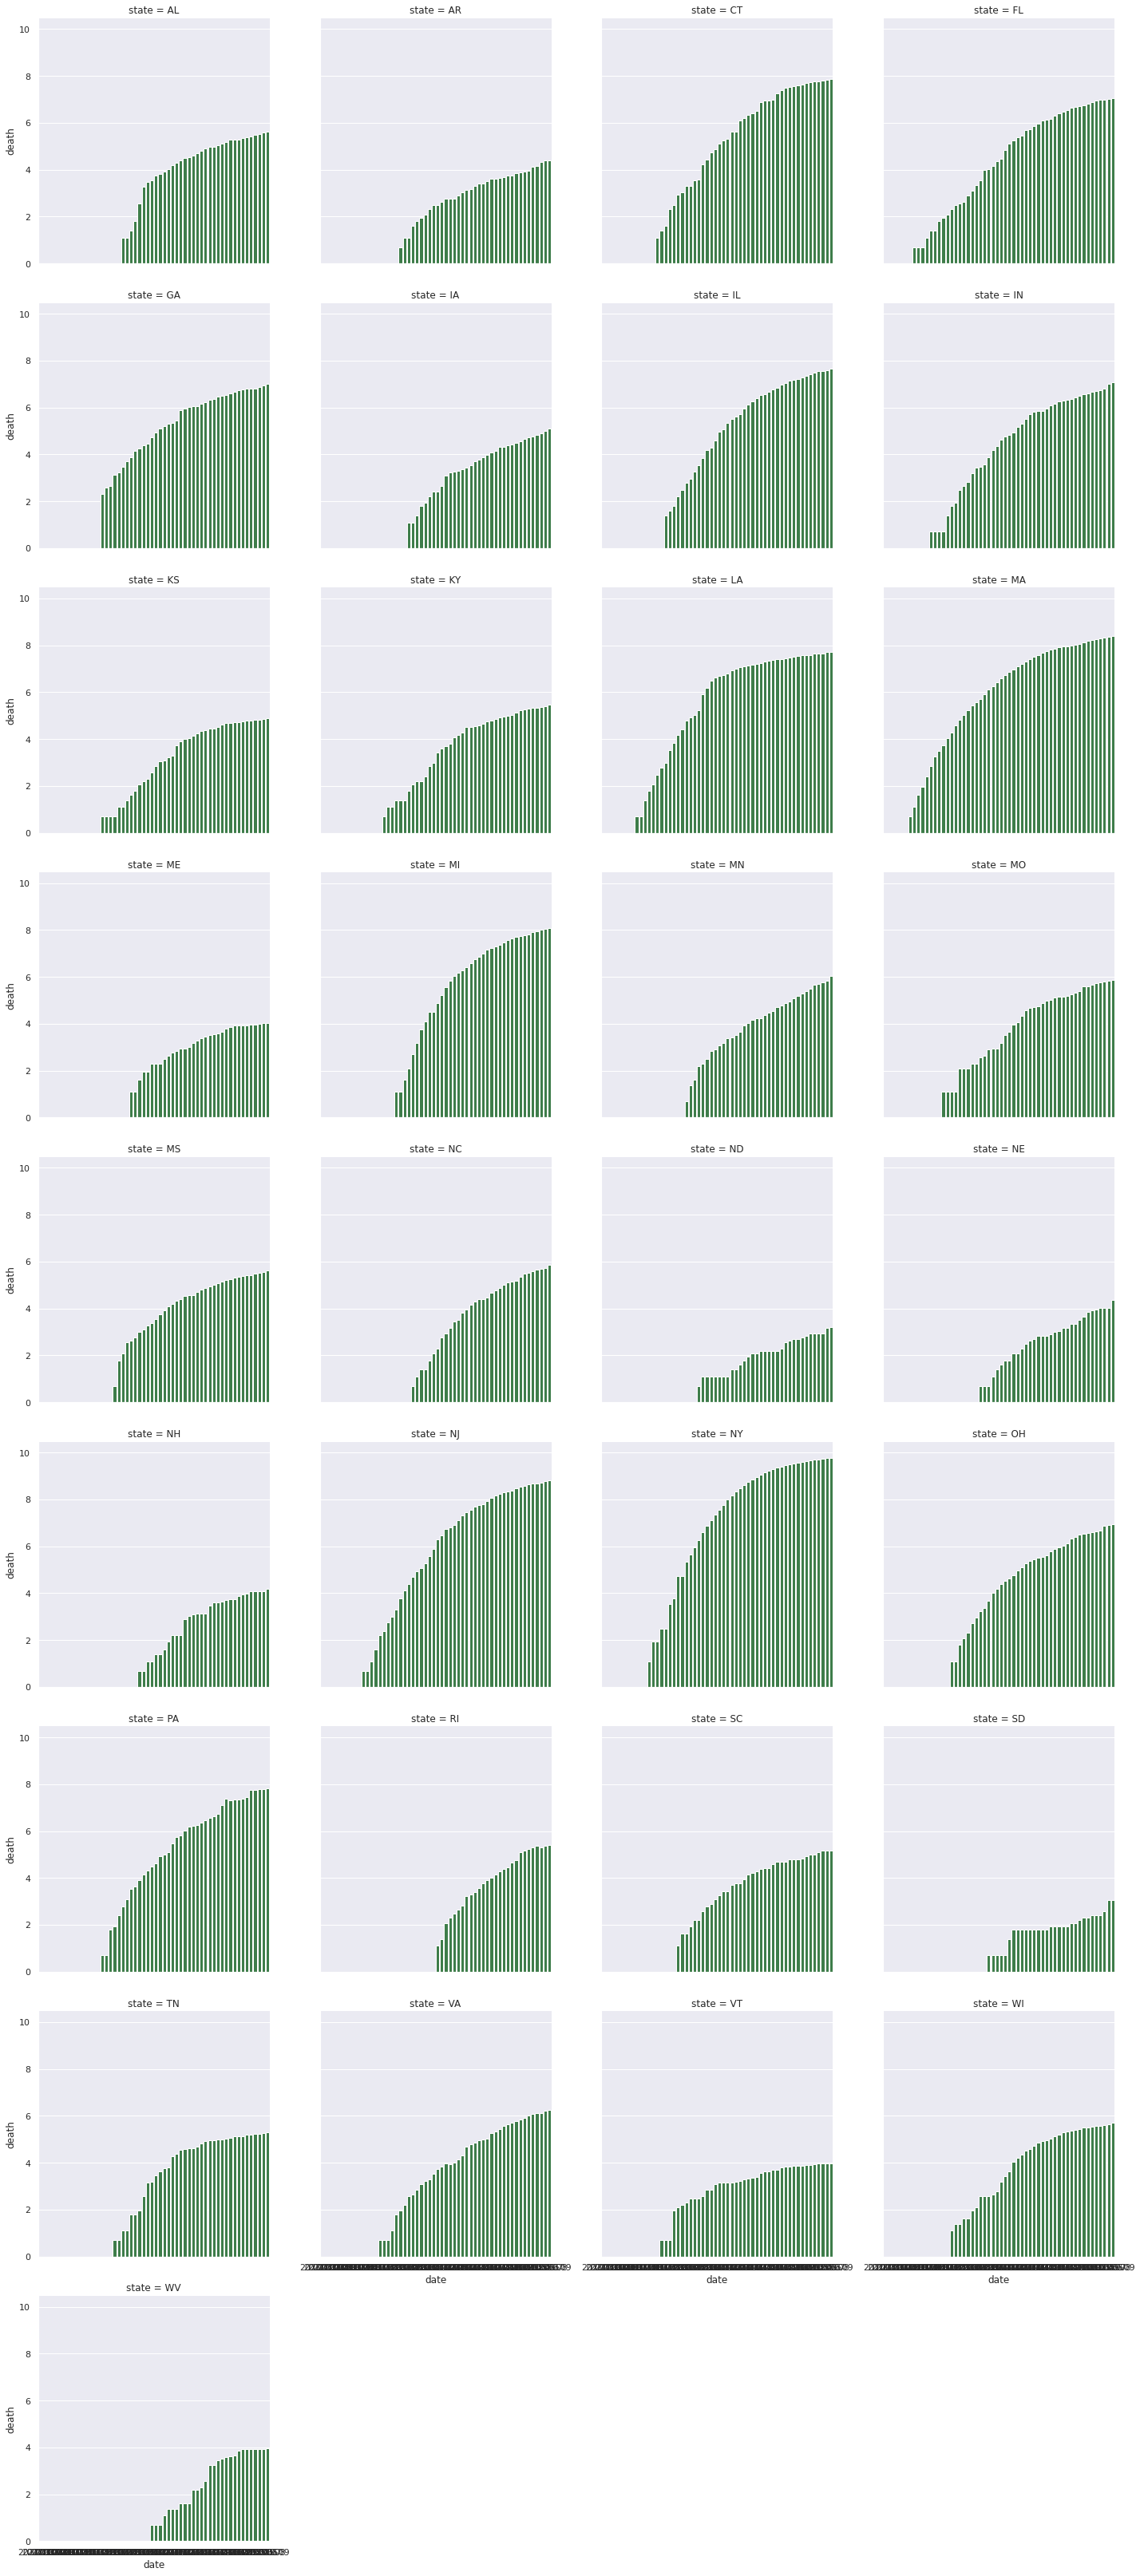

In [208]:
import seaborn as sns

sns.set(rc={'figure.figsize':(10,20)})

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 5.7,5.27
plotData = pd.read_csv('./data.csv')
plotData['death'] = np.log(plotData['death'])
# plotData['date'] = plotData['date']- 20200000
OverallQualPlot = sns.FacetGrid(plotData, col="state", margin_titles=True, col_wrap=4,height=5)
OverallQualPlot.map(sns.barplot, "date", "death", color="#338844")
# sns.barplot.set_xticklabels(g.get_xticklabels(), rotation=90)


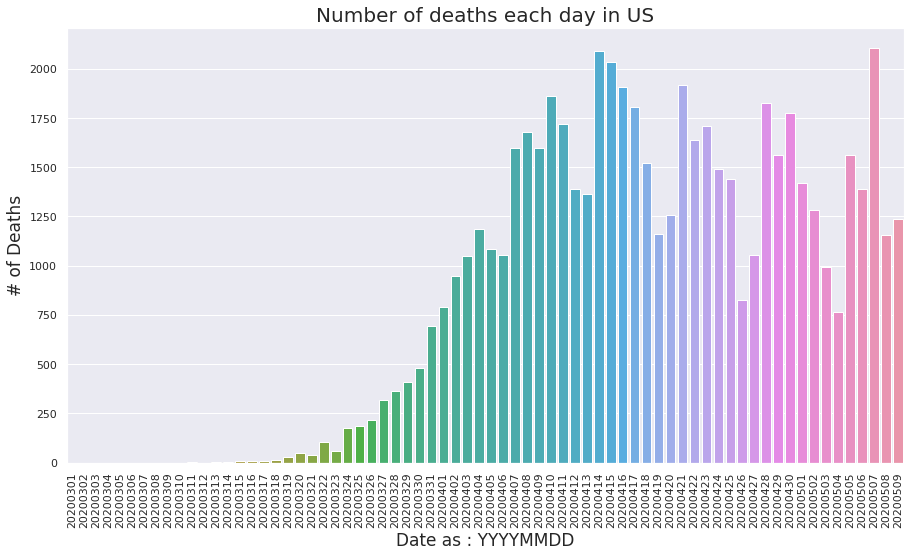

In [209]:
cumData1 = newCovid[['deathIncrease', 'date']]

totalpositives = cumData1['deathIncrease'].groupby(cumData1['date']) 
x = totalpositives.sum()

plt.figure(figsize=(15,8))

g = sns.barplot(x.keys(),x)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.xlabel('Date as : YYYYMMDD', size=17)
plt.ylabel('# of Deaths', size=17)
plt.title("Number of deaths each day in US", size = 20);

>The above graph gives us the number of deaths on each day from March 1st 2020 to 9th May 2020. As we can see, the number of deaths have been increasing from March to May. The increase in deaths was steep from March 20th to April 7th. There is no specific pattern in the number of deaths each day. But there has not been a steep increase in deaths over these few months. 




Text(0, 0.5, '# of Positive Cases')

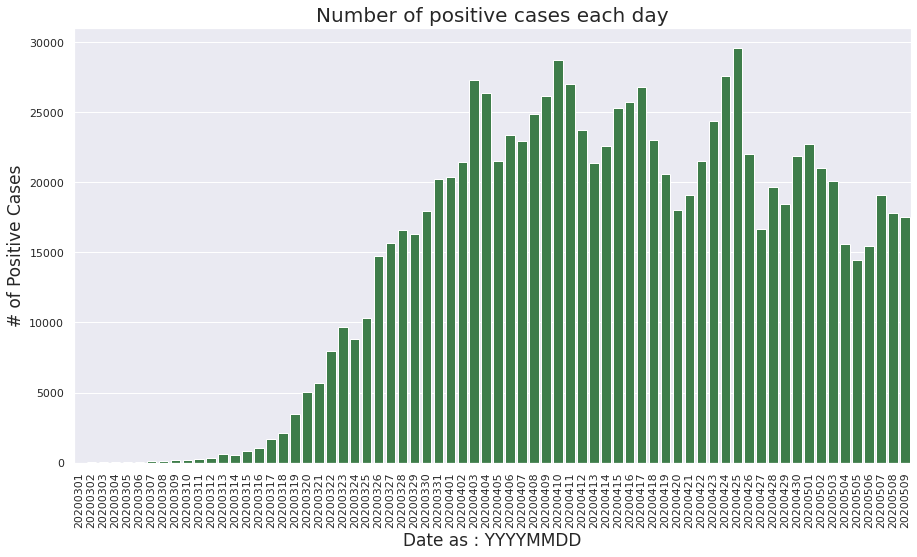

In [210]:
cumData1 = newCovid[['positiveIncrease', 'date']]
plt.figure(figsize=(15,8))

totalpositives = cumData1['positiveIncrease'].groupby(cumData1['date']) 
x = totalpositives.sum()

g = sns.barplot(x.keys(),x,color="#338844")

g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.title("Number of positive cases each day", size = 20);
plt.xlabel('Date as : YYYYMMDD', size=17)
plt.ylabel('# of Positive Cases', size=17)


> The above graph shows us the number of positive cases that are coming up each day from 1st March 2020 to 9th May 2020. We can observe a similar distribution in this graph as we saw for deaths. However the values on the y axis differ greatly. The number of positive cases each day is way more than the number of deaths. There was a steep increase in the number of positive cases from around 10th March to 3rd April and this kind of increase was not observed at later stages. The number of positive cases have been similar over the past month in the United States.

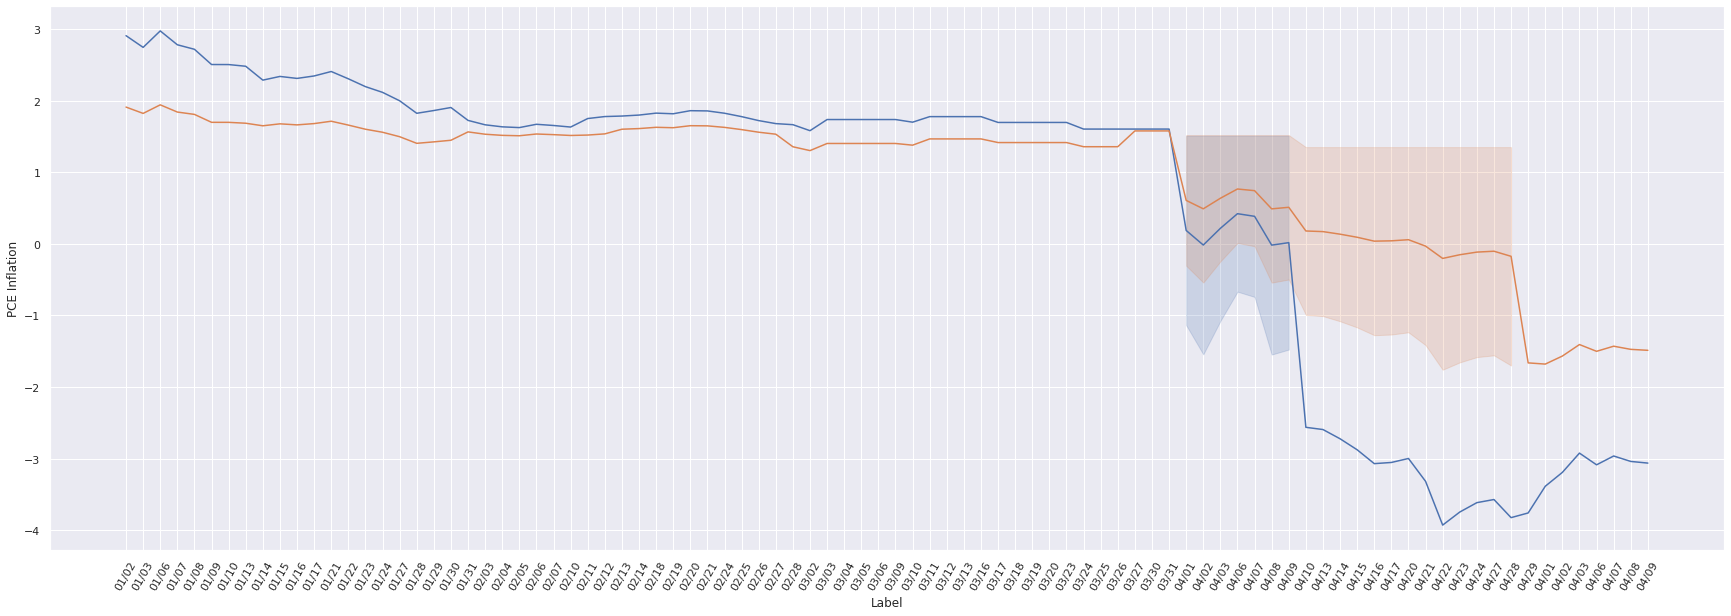

In [211]:
q1_data=pd.read_csv("./QuarterlyAnnualizedPercentChange-2020-q1.csv")
q2_data=pd.read_csv("./QuarterlyAnnualizedPercentChange-2020-q2.csv")
X_dataset = pd.concat([q1_data,q2_data])
X_dataset['date']=X_dataset.apply(lambda row: int("2020"+(row['Label'].split("/")[0])+(row['Label'].split("/")[1])),axis=1)
X_data=X_dataset[(X_dataset.date>=20200301) & (X_dataset.date<=20200509)]
# import matplotlib.pyplot as plt
# plt.plot((X_data['CPI Inflation']),(X_data['date']))

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.figure(figsize=(30,10))

ax = sns.lineplot(x="Label", y="CPI Inflation", data=X_dataset)
ax.set_xticklabels(X_dataset.Label,rotation=60)
ax = sns.lineplot(x="Label", y="PCE Inflation", data=X_dataset)


###3. Solve the required inferences for your dataset. See “Required inferences” section below. Only use tools/tests learned in class. Show your work clearly and comment on results as appropriate.

##Required Inference 1

1. Use your COVID19 dataset to predict the COVID19 fatality and #cases for the next one week. Use the following four prediction techniques: (i) AR(3), (ii) AR(5), (iii) EWMA with alpha = 0.5, and (iv) EWMA with alpha = 0.8. Make sure that your dataset allows you to verify the one week prediction. For example, use the first three weeks of data to predict the fourth week, and report the accuracy of your predictions using the actual fourth week data. Use metrics learned in class (MAPE as a % and MSE) to report accuracy numbers.

In [0]:
state = 'NY'
#get the 'positiveIncrease', 'deathIncrease' values for the 1st 28 days for the given state
onemonth = covidData[(covidData.state==state) & (covidData.positiveIncrease.notnull())][['date','state', 'positiveIncrease', 'deathIncrease']].head(28)

In [0]:
#calculates the expected value y_hat for next day.
def nextDayAR(p, y):
    X = pd.DataFrame()
    #constructs a matrix X used to calculate the values for beta using all the previous values of y
    for i in range(0,p):
        tempX = y.iloc[i:(y.shape[0]-p+i)]
        tempX.reset_index(drop=True, inplace=True)
        X.insert(loc=0, column = i, value = tempX)
    X.reset_index(drop=True, inplace=True)
    X.insert(loc=0, column = p, value = 1)
    
    #OLS calculation to find beta
    x = np.array(X)
    x_transpose = x.transpose()
    b_ols = np.dot(pinv(np.dot(x_transpose, x)), np.dot(x_transpose, y.iloc[p:]))

    #y_hat = beta0 + beta1*y(t) + .... + betap*y(t-p+1)
    y_hat = 0.0
    for i in range(1,p+1):
        y_hat = y_hat + b_ols[i] * y.iloc[y.shape[0]-i]
    y_hat = y_hat + b_ols[0]
    
    return y_hat

In [0]:
#calculation of MSE value using actual and predicted values
def MSE(y_actual, y_predicted):
    sum = 0.0
    for i in range(len(y_actual)):
        sum = sum + (y_actual[i] - y_predicted[i])**2
    return sum/len(y_actual)

In [0]:
#calculation of MAPE using actual and predicted values
def MAPE(y_actual, y_predicted):
    frac = 0.0
    for i in range(len(y_actual)):
        frac = frac + (abs(y_actual[i] - y_predicted[i])/y_actual[i])
    return (frac*100)/len(y_actual)

In [0]:
#predicting y values for 4th week using AutoRegression
#p - AutoRegression parameter
#onemonth - <'date','state', 'positiveIncrease', 'deathIncrease'> values for one month
#attr - positiveIncrease/deathIncrease for which the 4th week values need to be predicted
def fourthWeekARandError(p, onemonth, attr):
    y = onemonth[attr].head(21)
    y_actual = onemonth[attr].tail(7).tolist()
    y_pred = []
    y.reset_index(drop=True, inplace=True)
    #for each of the 7 days of 4th week, calculate y_hat using nextDayAR()
    for i in range(0, 7):
        y_hat = nextDayAR(p, y)
        y.loc[y.shape[0]] = y_hat
        y_pred.append(y_hat)
    
    #print actual, predicted, MSE error and MAPE error
    print('AR(' + str(p) + ') for ' + attr)
    print('y actual: ' + str(y_actual))
    print('y predicted: ' + str(y_pred))
    
    print('MSE: ' + str(MSE(y_actual, y_pred)))
    print('MAPE: ' + str(MAPE(y_actual, y_pred)))

In [0]:
#predicting y values for 4th week using EWMA
#alpha - EWMA parameter
#onemonth - <'date','state', 'positiveIncrease', 'deathIncrease'> values for one month
#attr - positiveIncrease/deathIncrease for which the 4th week values need to be predicted
def EWMA(alpha, onemonth, attr):
    y = onemonth[attr].tolist()
    y_actual = onemonth[attr].tail(7).tolist()
    y_pred = []
    y_hat = y[0]
    y_pred.append(y_hat)
    
    #calculating y_hat value for each day using previous day's value
    #y_hat(t+1) = alpha * y(t) + (1-alpha) * y_hat(t)
    for i in range(len(y)-1):
        y_hat = (alpha * y[i]) + ((1 - alpha) * y_hat)
        y_pred.append(y_hat)
    
    #print actual, predicted, MSE error and MAPE error
    print('EWMA (alpha = ' + str(alpha) + ') for ' + attr)
    print('y actual: ' + str(y_actual))
    print('y predicted: ' + str(y_pred[-7:]))
    
    print('MSE: ' + str(MSE(y_actual, y_pred[-7:])))
    print('MAPE: ' + str(MAPE(y_actual, y_pred[-7:])))

###AutoRegression AR (3)

predict the 4th week values for positiveIncrease

In [218]:
fourthWeekARandError(3, onemonth, 'positiveIncrease')

AR(3) for positiveIncrease
y actual: [5146.0, 6447.0, 7377.0, 7683.0, 7195.0, 6984.0, 9298.0]
y predicted: [4356.320576700623, 3941.137082272116, 3620.573425455474, 3364.518828060703, 3164.74411828238, 3010.2026207514655, 2892.0722791179696]
MSE: 16104700.120710215
MAPE: 49.02174923860046


predict the 4th week values for deathIncrease

In [219]:
fourthWeekARandError(3, onemonth, 'deathIncrease')

AR(3) for deathIncrease
y actual: [75.0, 100.0, 134.0, 209.0, 237.0, 253.0, 332.0]
y predicted: [-201.958096556656, -60.09165723963686, -920.2800522026408, -334.77671661429224, -1969.296308433993, 1136.4180833918435, -934.091529548547]
MSE: 1251527.6205482867
MAPE: 462.54031652637156


###AutoRegression AR (5)

predict the 4th week values for positiveIncrease

In [220]:
fourthWeekARandError(5, onemonth, 'positiveIncrease')

AR(5) for positiveIncrease
y actual: [5146.0, 6447.0, 7377.0, 7683.0, 7195.0, 6984.0, 9298.0]
y predicted: [3481.8203178472954, -1006.6223983507698, -10841.658287269096, -25065.844602001285, -47119.864398301295, -78449.01052417465, -115323.83983003342]
MSE: 3891748436.839728
MAPE: 591.377501893965


predict the 4th week values for deathIncrease

In [221]:
fourthWeekARandError(5, onemonth, 'deathIncrease')

AR(5) for deathIncrease
y actual: [75.0, 100.0, 134.0, 209.0, 237.0, 253.0, 332.0]
y predicted: [-181.51868658156926, 17.312962768717878, -669.3495803352197, 168.20513640016304, -1075.5178809209297, 1996.3529285402929, -776.3944873455906]
MSE: 958599.2446539716
MAPE: 374.3538166318466


###EWMA (0.5)

predict the 4th week values for positiveIncrease

In [222]:
EWMA(0.5, onemonth, 'positiveIncrease')

EWMA (alpha = 0.5) for positiveIncrease
y actual: [5146.0, 6447.0, 7377.0, 7683.0, 7195.0, 6984.0, 9298.0]
y predicted: [4755.463296890259, 4950.731648445129, 5698.865824222565, 6537.932912111282, 7110.466456055641, 7152.733228027821, 7068.36661401391]
MSE: 1646504.671744999
MAPE: 13.71722614735865


predict the 4th week values for deathIncrease

In [223]:
EWMA(0.5, onemonth, 'deathIncrease')

EWMA (alpha = 0.5) for deathIncrease
y actual: [75.0, 100.0, 134.0, 209.0, 237.0, 253.0, 332.0]
y predicted: [58.0810546875, 66.54052734375, 83.270263671875, 108.6351318359375, 158.81756591796875, 197.90878295898438, 225.4543914794922]
MSE: 4935.985974212743
MAPE: 32.679021540552164


###EWMA(0.8)

predict the 4th week values for positiveIncrease

In [224]:
EWMA(0.8, onemonth, 'positiveIncrease')

EWMA (alpha = 0.8) for positiveIncrease
y actual: [5146.0, 6447.0, 7377.0, 7683.0, 7195.0, 6984.0, 9298.0]
y predicted: [4924.201866805894, 5101.640373361179, 6177.928074672236, 7137.185614934448, 7573.83712298689, 7270.767424597378, 7041.353484919476]
MSE: 1273297.19678859
MAPE: 11.739723073290486


predict the 4th week values for deathIncrease

In [225]:
EWMA(0.8, onemonth, 'deathIncrease')

EWMA (alpha = 0.8) for deathIncrease
y actual: [75.0, 100.0, 134.0, 209.0, 237.0, 253.0, 332.0]
y predicted: [79.12730542080001, 75.82546108416, 95.165092216832, 126.2330184433664, 192.4466036886733, 228.08932073773468, 248.01786414754693]
MSE: 2659.7874981249706
MAPE: 21.74302251314577


## Required Inference 2
2. Apply the Wald’s test, Z-test, and t-test (assume all are applicable) to check whether the mean of COVID19 deaths and #cases are different from the second-last week to the last week in your dataset. Use MLE for Wald’s test as the estimator; assume for Wald’s estimator purposes that daily data is Poisson distributed. Note, you have to report results for deaths and #cases separately, so think of this as two inferences. After running the test and reporting the numbers, check and comment on whether the tests are applicable or not. First use one-sample tests by computing the mean of the second-last week data and using that as guess for last week data. Then, repeat with a two-sample version of Wald and t-tests. For t-test, use both paired and unpaired tests. Use alpha value of 0.05 for all. For t-test, the threshold to check against is tn-1, alpha/2 for two-tailed, where n is the number of data points. You can find these values in online t tables, similar to z tables. For Z-test, use the sample standard deviation of the entire covid19 dataset you have and use that as the true sigma value.

#### Wald's Two Sample Test

In [0]:
covidData = pd.read_csv(r'./data.csv')
last_week_cases = list(covidData.groupby(['date']).sum().positiveIncrease[-7:])
second_last_week_cases = list(covidData.groupby(['date']).sum().positiveIncrease[-14:-7])
last_week_deaths = list(covidData.groupby(['date']).sum().deathIncrease[-7:])
second_last_week_deaths = list(covidData.groupby(['date']).sum().deathIncrease[-14:-7])

In [227]:
def walds_two_sample_test(data_x, data_y, label):
    theta_0 = 0
    # used mle to estimate mean and variance
    mle_mean_x = sum(data_x)/len(data_x)
    mle_mean_y = sum(data_y)/len(data_y)

    mle_var_x = sum([(n-mle_mean_x)**2 for n in data_x])/len(data_x)
    mle_var_y = sum([(n-mle_mean_y)**2 for n in data_y])/len(data_y)

    theta_mle = abs(mle_mean_x - mle_mean_y)
    var_x = mle_var_x/len(data_x)
    var_y = mle_var_y/len(data_y)
    std_err = math.sqrt(var_x + var_y)

    W = abs(theta_mle - theta_0)/std_err
    print (label, W)
    if W < 1.96:
        print("We accept the null hypothesis")
    else:
        print("We reject the null hypothesis")

walds_two_sample_test(last_week_cases, second_last_week_cases, "Wald's two sample test statistic for number of cases:")
walds_two_sample_test(last_week_deaths, second_last_week_deaths, "Wald's two sample test statistic for number of deaths:")

Wald's two sample test statistic for number of cases: 3.0577647047382293
We reject the null hypothesis
Wald's two sample test statistic for number of deaths: 0.38301190667394336
We accept the null hypothesis


For Wald's two sample test to be applicable the estimator need to be Asymptotically Normal

Since we are using MLE estimator which is Asymptotically Normal the Wald's two sample test is applicable

It can be concluded that as for  number of cases |Z|= 3.058 > 1.96 threshold, we reject the null hypothesis -> mean for last week's data [week 2] != mean of second last week's data(mu0).

For number of deaths as well, |Z| = 0.383 < 1.96, hence we accept the null hypothesis

#### Wald's one sample Test

In [228]:
def walds_one_sample_test(data_x, data_y, label):
    theta_mle = sum(data_x)/len(data_x)
    theta_0 = sum(data_y)/len(data_y)
    mle_mean_x = sum(data_x)/len(data_x)
    mle_var_x = sum([(n-mle_mean_x)**2 for n in data_x])/len(data_x)
    var_x = mle_var_x/len(data_x)
    std_err = math.sqrt(var_x)

    W = abs(theta_mle - theta_0)/std_err
    print (label, W)
    if W < 1.96:
        print("We accept the null hypothesis")
    else:
        print("We reject the null hypothesis")
walds_one_sample_test(last_week_cases, second_last_week_cases, "Wald's two sample test statistic for number of cases:")
walds_one_sample_test(last_week_deaths, second_last_week_deaths, "Wald's two sample test statistic for number of deaths:")

Wald's two sample test statistic for number of cases: 4.460891384661064
We reject the null hypothesis
Wald's two sample test statistic for number of deaths: 0.5019973235335636
We accept the null hypothesis


For Wald's one sample test to be applicable the estimator need to be Asymptotically Normal

Since we are using MLE estimator which is Asymptotically Normal the Wald's one sample test is applicable

It can be concluded that as for  number of cases |W|= 4.461 > 1.96 threshold, we reject the null hypothesis -> mean for last week's data [week 2] != mean of second last week's data(mu0).

For number of deaths as well, |W| = 0.383 < 1.96, hence we accept the null hypothesis

In [229]:
covidData = pd.read_csv(r'./data.csv')
twoWeeksData = covidData[(covidData['date']>20200425) & (covidData['date']<=20200509)]
twoWeeksData.head()

,Unnamed: 0,date,state,positive,negative,pending,death,total,totalTestResults,fips,deathIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
24,337,20200503,AL,7725.0,84775.0,0.0,290.0,92500,92500,1,2.0,0.0,291.0,291.0
29,561,20200429,AL,6842.0,73607.0,0.0,245.0,80449,80449,1,3.0,4467.0,155.0,4622.0
32,729,20200426,AL,6270.0,67281.0,0.0,216.0,73551,73551,1,4.0,2074.0,133.0,2207.0
34,281,20200504,AL,8025.0,95092.0,0.0,296.0,103117,103117,1,6.0,10317.0,300.0,10617.0
35,673,20200427,AL,6499.0,67498.0,0.0,222.0,73997,73997,1,6.0,217.0,229.0,446.0


In [230]:
data = twoWeeksData.groupby('date')
data.head()
twoWeeksData['week'] = twoWeeksData.apply(lambda row: 'week1' if((row['date']>20200425) & (row['date']<=20200502)) else 'week2',axis=1)
twoWeeksData['week'] = twoWeeksData.apply(lambda row: 'week1' if((row['date']>20200425) & (row['date']<=20200502)) else 'week2',axis=1)
NoOfDeaths=twoWeeksData.groupby(['week','date']).deathIncrease.sum()
NoOfDeaths

week   date    
week1  20200426     826.0
       20200427    1055.0
       20200428    1824.0
       20200429    1560.0
       20200430    1776.0
       20200501    1418.0
       20200502    1281.0
week2  20200503     995.0
       20200504     764.0
       20200505    1563.0
       20200506    1390.0
       20200507    2104.0
       20200508    1156.0
       20200509    1235.0
Name: deathIncrease, dtype: float64

# Z statistic results


The assumption for Z test is true standard deviation is known and this is valid as we have precomputed std deviation for the entire dataset.

In [0]:
NoOfCases=twoWeeksData.groupby(['week','date']).positiveIncrease.sum()

def compute_Z_Test(NoOfCases,NoOfDeaths,alpha):
    week1_mean_num_cases = NoOfCases['week1'].mean()
    week1_mean_num_deaths = NoOfDeaths['week1'].mean()
    week2_mle_num_cases= NoOfCases['week2'].mean()
    week2_mle_num_deaths = NoOfDeaths['week2'].mean()
    week2_num_cases_stddev = covidData['positiveIncrease'].std()
    week2_num_deaths_stddev = covidData['deathIncrease'].std()
    n1=len(NoOfDeaths['week1'])
    n2=len(NoOfDeaths['week2'])
    Z_stat_num_cases =  (week2_mle_num_cases-week1_mean_num_cases)/(week2_num_cases_stddev/np.sqrt(n2))
    Z_stat_num_deaths =  (week2_mle_num_deaths-week1_mean_num_deaths)/(week2_num_deaths_stddev/np.sqrt(n2))
    threshold = np.abs(st.norm.ppf(alpha/2))
    return np.abs(Z_stat_num_cases),np.abs(Z_stat_num_deaths),threshold

In [0]:
Z_stat_num_cases,Z_stat_num_deaths,threshold = compute_Z_Test(NoOfCases,NoOfDeaths,0.05)

In [233]:
print("For number of cases -  last week data with m0 for second last week: |Z| =",Z_stat_num_cases)
print("For number of deaths -  last week data with m0 for second last week: |Z| =",Z_stat_num_deaths)

print("threshold with alpha = 0.05 is ",threshold)

For number of cases -  last week data with m0 for second last week: |Z| = 7.106998001565005
For number of deaths -  last week data with m0 for second last week: |Z| = 2.3732979258122993
threshold with alpha = 0.05 is  1.9599639845400545


It can be concluded that as for  number of cases |Z|= 7.106 > 1.96 threshold, we reject the null hypothesis -> mean for last week's data [week 2] != mean of second last week's data(mu0).


For number of deaths as well, |Z| = 2.373 > 1.96, hence we reject the null hypothesis

## **T statistic results - One Sampled T test**

In [0]:
def compute_T_Test_One_sampled(NoOfCases,NoOfDeaths,alpha):
    week1_mean_num_cases = NoOfCases['week1'].mean()
    week1_mean_num_deaths = NoOfDeaths['week1'].mean()
    week2_mle_num_cases= NoOfCases['week2'].mean()
    week2_mle_num_deaths = NoOfDeaths['week2'].mean()
    week2_num_cases_sample_stddev= NoOfCases['week2'].std()
    week2_num_deaths_sample_stddev = NoOfDeaths['week2'].std()
    n1=len(NoOfDeaths['week1'])
    n2=len(NoOfDeaths['week2'])
    t_stat_num_cases = (week2_mle_num_cases -week1_mean_num_cases )/(week2_num_cases_sample_stddev/np.sqrt(n2))
    t_stat_num_deaths = (week2_mle_num_deaths -week1_mean_num_deaths )/(week2_num_deaths_sample_stddev/np.sqrt(n2))
    threshold = np.abs(st.t.ppf(alpha/2, n2-1))
    return np.abs(t_stat_num_cases),np.abs(t_stat_num_deaths),threshold

In [0]:
t_stat_num_cases,t_stat_num_deaths,threshold = compute_T_Test_One_sampled(NoOfCases,NoOfDeaths,alpha)

In [236]:
print("For number of cases - last week data with m0 for second last week: |T| =",t_stat_num_cases)
print("For number of deaths - last week data with m0 for second last week: |T| =",t_stat_num_deaths)
print("threshold with alpha = 0.05 is ",threshold)

For number of cases - last week data with m0 for second last week: |T| = 4.1299829068214216
For number of deaths - last week data with m0 for second last week: |T| = 0.4647592121593977
threshold with alpha = 0.05 is  0.7175581964909963


Here N=7, small sample size and hence T test is applicable. 
For number of cases , |T| = 4.129 > 0.717 , hence we reject null hypothesis.

For number of deaths, |T|=0.46 < 0.717, hence we accept null hypothesis here. Thus, the estimated mean number of deaths for last week = mean number of deaths second last week

# T statistic results - Paired T Test

In [0]:
def compute_T_Test_Paired(NoOfCases,NoOfDeaths,alpha):
    diff_num_cases = pd.Series(NoOfCases['week2'].values- NoOfCases['week1'].values)
    diff_num_cases_mean = diff_num_cases.mean()
    diff_num_cases_stddev = diff_num_cases.std()
    n1=len(NoOfDeaths['week1'])
    n2=len(NoOfDeaths['week2'])
    num_cases_paired_t_stat = (diff_num_cases_mean-0)/(diff_num_cases_stddev/np.sqrt(n2))

    diff_num_deaths = pd.Series(NoOfDeaths['week2'].values- NoOfDeaths['week1'].values)
    diff_num_deaths_mean = diff_num_deaths.mean()
    diff_num_deaths_stddev = diff_num_deaths.std()
    num_deaths_paired_t_stat = (diff_num_deaths_mean-0)/(diff_num_deaths_stddev/np.sqrt(n2))
    threshold = np.abs(st.t.ppf(alpha/2, n2-1))

    return np.abs(num_cases_paired_t_stat),np.abs(num_deaths_paired_t_stat),threshold

In [238]:
num_cases_paired_t_stat,num_deaths_paired_t_stat,threshold = compute_T_Test_Paired(NoOfCases,NoOfDeaths,alpha)

print("For number of cases - Paired T test: |T| for last 2 weeks data=",num_cases_paired_t_stat)
print("For number of deaths - Paired T test for last 2 weeks data: |T| =",num_deaths_paired_t_stat)
print("threshold with alpha = 0.05 (T_n_alpha) is ",threshold)

For number of cases - Paired T test: |T| for last 2 weeks data= 5.732845197054555
For number of deaths - Paired T test for last 2 weeks data: |T| = 0.8364691536150204
threshold with alpha = 0.05 (T_n_alpha) is  0.7175581964909963


Here N1=N2=7, small sample sizes are same.

|T| = 5.732 > 0.717 , hence we reject null hypothesis for number of cases and |T|=0.836 hence we reject null also for number of deaths

# T statistic results - UnPaired T Test


In [0]:
def compute_T_Test_Unpaired(NoOfCases,NoOfDeaths,alpha):
    diff_mean_num_cases = NoOfCases['week2'].mean() - NoOfCases['week1'].mean()
    week1_num_cases_sample_stddev= NoOfCases['week1'].std()
    week2_num_cases_sample_stddev= NoOfCases['week2'].std()
    week2_num_deaths_sample_stddev = NoOfDeaths['week2'].std()
    n1=len(NoOfDeaths['week1'])
    n2=len(NoOfDeaths['week2'])
    unpaired_t_stat_num_cases = (diff_mean_num_cases-0)/(np.sqrt((week2_num_cases_sample_stddev**2/n2)+ (week1_num_cases_sample_stddev**2/n1)))
    
    threshold = np.abs(st.t.ppf(alpha/2, n2-1))

    diff_mean_num_deaths = NoOfDeaths['week2'].mean() - NoOfDeaths['week1'].mean()
    week1_num_deaths_sample_stddev = NoOfDeaths['week1'].std()
    unpaired_t_stat_num_deaths = (diff_mean_num_deaths-0)/(np.sqrt((week2_num_deaths_sample_stddev**2/n2)+ (week1_num_deaths_sample_stddev**2/n1)))
   
    return np.abs(unpaired_t_stat_num_cases),np.abs(unpaired_t_stat_num_deaths),threshold

In [240]:
unpaired_t_stat_num_cases,unpaired_t_stat_num_deaths,threshold = compute_T_Test_Unpaired(NoOfCases,NoOfDeaths,alpha)

print("For number of cases - UnPaired T test: |T| for last 2 weeks data=",unpaired_t_stat_num_cases)
print("For number of deaths - UnPaired T test for last 2 weeks data: |T| =",unpaired_t_stat_num_deaths)
print("threshold with alpha = 0.05 (T_n_alpha) is ",threshold)

For number of cases - UnPaired T test: |T| for last 2 weeks data= 2.830940024021734
For number of deaths - UnPaired T test for last 2 weeks data: |T| = 0.3546001216509454
threshold with alpha = 0.05 (T_n_alpha) is  0.7175581964909963


Here N1=N2=7, small sample sizes are same.
|T| = 2.83 > 0.717 , hence we reject null hypothesis for number of cases and |T|=0.354 hence we accept null  for number of deaths

## Required Inference 3

3. Repeat inference 2 above but for equality of distributions (distribution of second-last week and last week), using K-S test and Permutation test. For the K-S test, use both 1-sample and 2-sample tests. For the 1-sample test, try Poisson, Geometric, and Binomial. To obtain parameters of these distributions to check against in 1-sample KS, use MME on second last week’s data to obtain parameters of the distribution, and then check whether the last week’s data has the distribution with the obtained MME parameters. Use a threshold of 0.05 for both K-S test and Permutation test.


#### K-S Test - Two Sample

In [0]:
covidData = pd.read_csv(r'./data.csv')
last_week_cases = list(covidData.groupby(['date']).sum().positiveIncrease[-7:])
second_last_week_cases = list(covidData.groupby(['date']).sum().positiveIncrease[-14:-7])
last_week_deaths = list(covidData.groupby(['date']).sum().deathIncrease[-7:])
second_last_week_deaths = list(covidData.groupby(['date']).sum().deathIncrease[-14:-7])

KS two sample test statistic for number of cases:
For last week v/s second last week max difference is 0.5714285714285714 at point 18479.0
Since 0.5714285714285714 is greater than C=0.05, we accept the Null hypothesis. Hence the distribution is the same


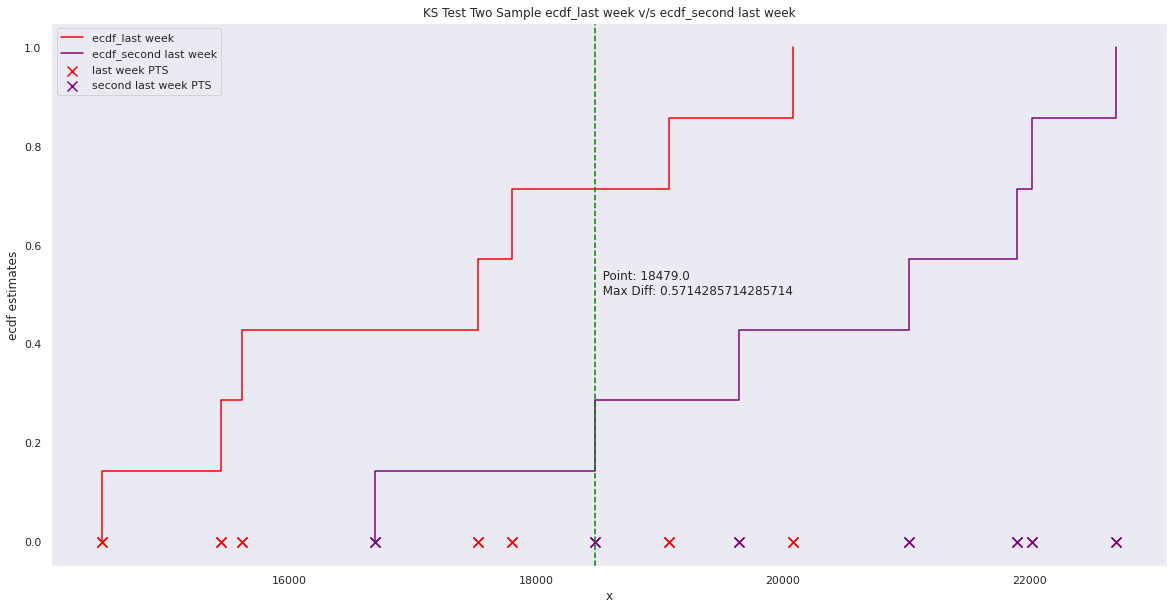

KS two sample test statistic for number of deaths:
For last week v/s second last week max difference is 0.28571428571428575 at point 1418.0
Since 0.28571428571428575 is greater than C=0.05, we accept the Null hypothesis. Hence the distribution is the same


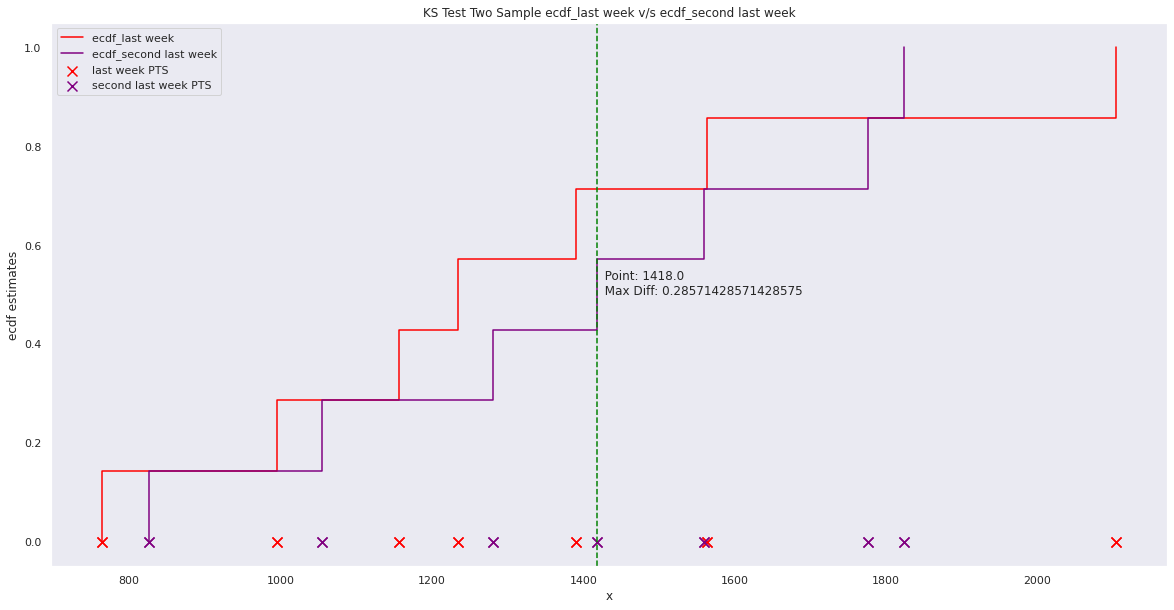

In [242]:
#Function to help visualize the steps in the plots
def computeY(Y):
    y_computed=[]
    for y in Y:
        y_computed.append(y)
        y_computed.append(y)

    del y_computed[-1]
    y_computed=[0]+y_computed
    return y_computed

#Function for plotting the points
def generatePlot(ecdf_2019,ecdf_2009,X_2019, X_2009, label1, label2, png_name,mark, max_diff):
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    plt.plot(X_2019, ecdf_2019 ,label='ecdf_'+label1,color='red')
    plt.plot(X_2009, ecdf_2009 ,label='ecdf_'+label2,color='purple')
    
    n=len(X_2019)
    plt.scatter(X_2019, [0]*n, color='red', marker='x', s=100, label=label1+' PTS')
    n=len(X_2009)
    plt.scatter(X_2009, [0]*n, color='purple', marker='x', s=100, label=label2+' PTS')
    plt.axvline(x=mark, color='green',linestyle='--')
    ax.annotate('  Point: '+ str(mark) +'\n  Max Diff: '+str(max_diff),
                xy=(mark,0.5))
    plt.xlabel('x')
    plt.ylabel('ecdf estimates')
    plt.legend(loc="upper left")
    plt.grid()
    plt.title('KS Test Two Sample ecdf_' + label1 + ' v/s ecdf_' + label2)
    plt.savefig(png_name)
    
    plt.show()

def ks_two_sample_test(last_week_data, second_last_week_data, label):
    X_2019 = list(last_week_data)
    X_2019.sort() 

    X_2009 = list(second_last_week_data)
    X_2009.sort()

    ecdf_2019=[]
    ecdf_2009=[]

    for x in X_2019:
        cdf_x_2019 = sum(i<=x for i in X_2019)/len(X_2019)
        ecdf_2019.append(cdf_x_2019)

    for x in X_2009:
        cdf_x_2009 = sum(i<=x for i in X_2009)/len(X_2009)
        ecdf_2009.append(cdf_x_2009)

    x_final_2019=[]
    for x in X_2019:
        x_final_2019.append(x)
        x_final_2019.append(x)

    x_final_2009=[]
    for x in X_2009:
        x_final_2009.append(x)
        x_final_2009.append(x)

    F_y_minus = 0
    increment = 1/len(X_2009)
    F_y_plus = increment
    F_x = 0
    mark = 0

    max_diff = -1
    for x in X_2009:
        F_x = sum(i<=x for i in X_2019)/len(X_2019)
        if abs(F_x - F_y_minus) > max_diff:
            max_diff = abs(F_x - F_y_minus)
            mark = x
        if abs(F_x - F_y_plus) > max_diff:
            max_diff = abs(F_x - F_y_plus)
            mark = x

        F_y_minus = F_y_plus
        F_y_plus += increment
    print(label)
    print('For last week v/s second last week max difference is', max_diff, 'at point', mark)
    if max_diff < 0.05:
        print('Since', max_diff, 'is less than C=0.05, we reject the Null hypothesis.', 'Hence the distribution isn\'t the same')
    else:
        print('Since', max_diff, 'is greater than C=0.05, we accept the Null hypothesis.', 'Hence the distribution is the same')

    y_final_cdf_2019=computeY(ecdf_2019)
    y_final_cdf_2009=computeY(ecdf_2009)

    generatePlot(y_final_cdf_2019,y_final_cdf_2009, x_final_2019, x_final_2009, 'last week', 'second last week', 'PTS_2019vs2009.png',mark, max_diff)

ks_two_sample_test(last_week_cases, second_last_week_cases, "KS two sample test statistic for number of cases:")
ks_two_sample_test(last_week_deaths, second_last_week_deaths, "KS two sample test statistic for number of deaths:")

Since KS test does not have any assumption, the test is applicable for this scenario.

KS two sample test statistic for number of cases:
For last week v/s second last week max difference is 0.5714285714285714 at point 18479.0
Since 0.5714285714285714 is greater than C=0.05, we accpet the Null hypothesis. Hence the distribution is the same

KS two sample test statistic for number of deaths:
For last week v/s second last week max difference is 0.28571428571428575 at point 1418.0
Since 0.28571428571428575 is greater than C=0.05, we accept the Null hypothesis. Hence the distribution is the same

#### Permutation Test - two sample

In [244]:
cases_last_week = list(last_week_cases)
cases_second_last_week = list(second_last_week_cases)

def calculate_T_i(X_union_Y, len_X):
     np.random.shuffle(X_union_Y)
     X_i = X_union_Y[:len_X]
     Y_i = X_union_Y[len_X:]
     mean_X_i = sum(X_i)/len(X_i)
     mean_Y_i = sum(Y_i)/len(Y_i)
     return abs(mean_X_i - mean_Y_i)

def calculate_p_value(X, Y, n):
    X_union_Y = X + Y
    len_X = len(X)
    len_Y = len(Y)
    mean_X = sum(X)/len_X
    mean_Y = sum(Y)/len_Y
    T_obs = abs(mean_X - mean_Y)

    count_Ti_greater_Tobs = 0
    for i in range(n):
        T_i = calculate_T_i(X_union_Y, len_X)
        if T_i > T_obs:
            count_Ti_greater_Tobs += 1
    p_value = count_Ti_greater_Tobs/n
    return p_value

p_value = calculate_p_value(cases_last_week, cases_second_last_week, 20000)
print('For n=20000 last week v/s second last week pvalue:', p_value)
print('Since', p_value, 'is less than 0.05, we reject the Null hypothesis.',
      'Hence the distribution isnt the same')

p_value = calculate_p_value(last_week_deaths, second_last_week_deaths, 20000)
print('For n=20000 last week v/s second last week pvalue:', p_value)
print('Since', p_value, 'is greater than 0.05, we reject accept the Null hypothesis.',
      'Hence the distribution is the same')

For n=20000 last week v/s second last week pvalue: 0.0183
Since 0.0183 is less than 0.05, we reject the Null hypothesis. Hence the distribution isnt the same
For n=20000 last week v/s second last week pvalue: 0.72495
Since 0.72495 is greater than 0.05, we reject accept the Null hypothesis. Hence the distribution is the same


For n=20000 last week v/s second last week pvalue: 0.018
Since 0.018 is less than 0.05, we reject the Null hypothesis. Hence the distribution isn't remain the same

For n=20000 last week v/s second last week pvalue: 0.72545
Since 0.72545 is greater than 0.05, we cannot reject the Null hypothesis. Hence the distribution is the same

### K-S Test - One Sample Poisson Distribution

[3.06788899e-002 2.65007817e-263 0.00000000e+000 6.89666051e-284
 7.18669563e-020 5.44611099e-075 1.22099749e-091] [2.44044839e-29 8.63822765e-76 9.99997006e-01 4.91851263e-01
 1.00000000e+00 4.45319944e-11 1.03321375e-05]
KS two sample test statistic for number of cases:
For last week v/s second last week max difference is 0.9693211101408529 at point 20087.0
Since 0.9693211101408529 is greater than C=0.05, we accept the Null hypothesis. Hence the distribution is the same


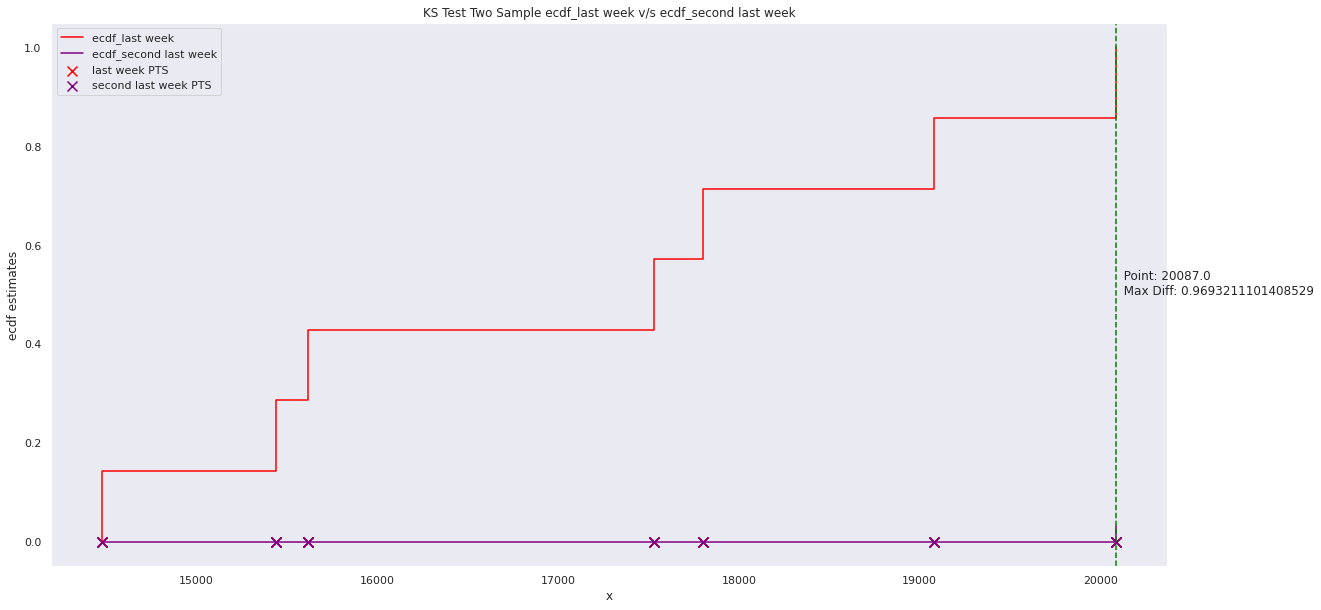

KS two sample test statistic for number of deaths:
For last week v/s second last week max difference is 0.571418239291088 at point 1235.0
Since 0.571418239291088 is greater than C=0.05, we accept the Null hypothesis. Hence the distribution is the same


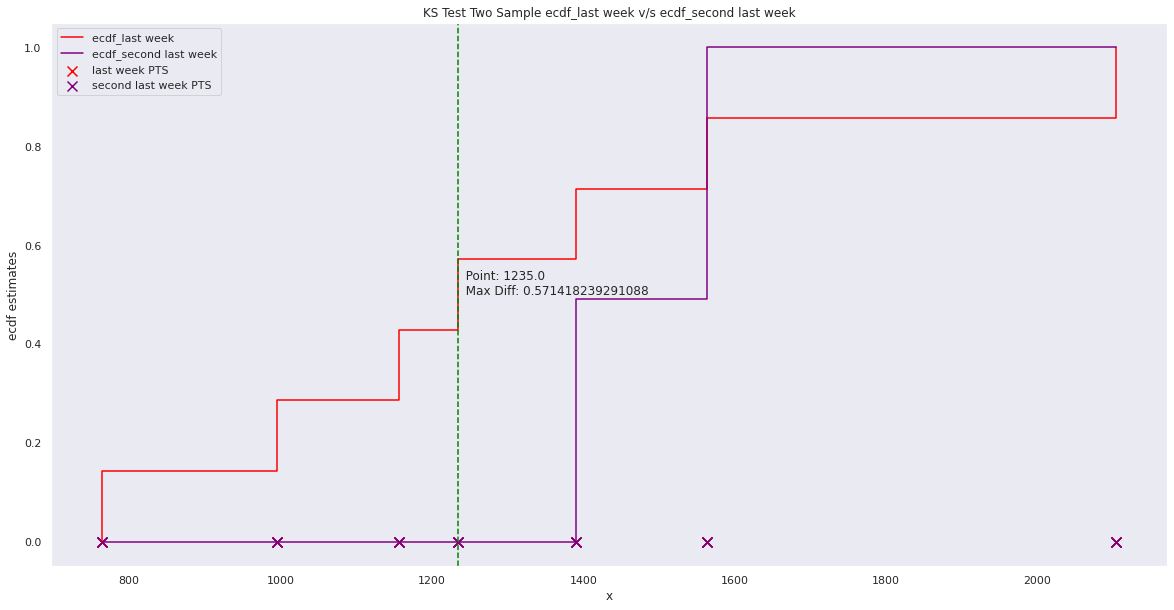

In [245]:
lambda_value = sum(second_last_week_deaths)/len(second_last_week_deaths)
cdf_poisson = poisson.cdf(last_week_deaths, lambda_value)

def ks_one_sample_test(last_week_data, ecdf_2009, label):
    X_2019 = list(last_week_data)
    X_2019.sort()
    ecdf_2009.sort()
    ecdf_2019=[]

    for x in X_2019:
        cdf_x_2019 = sum(i<=x for i in X_2019)/len(X_2019)
        ecdf_2019.append(cdf_x_2019)

    x_final_2019=[]
    for x in X_2019:
        x_final_2019.append(x)
        x_final_2019.append(x)

    x_final_2009=[]
    for x in X_2019:
        x_final_2009.append(x)
        x_final_2009.append(x)

    F_y_minus = 0
    increment = 1/len(X_2019)
    F_y_plus = increment
    F_x = 0
    mark = 0

    max_diff = -1
    for i in range(7):#x in ecdf_2009:
        F_x = ecdf_2009[i]#sum(i<=x for i in X_2019)/len(X_2019)
        if abs(F_x - F_y_minus) > max_diff:
            max_diff = abs(F_x - F_y_minus)
            mark = X_2019[i]
        if abs(F_x - F_y_plus) > max_diff:
            max_diff = abs(F_x - F_y_plus)
            mark = X_2019[i]

        F_y_minus = F_y_plus
        F_y_plus += increment
    print(label)
    print('For last week v/s second last week max difference is', max_diff, 'at point', mark)
    if max_diff < 0.05: 
        print('Since', max_diff, 'is less than C=0.05, we reject the Null hypothesis.', 'Hence the distribution isn\'t the same')
    else:
        print('Since', max_diff, 'is greater than C=0.05, we accept the Null hypothesis.', 'Hence the distribution is the same')

    y_final_cdf_2019=computeY(ecdf_2019)
    y_final_cdf_2009=computeY(ecdf_2009)

    generatePlot(y_final_cdf_2019,y_final_cdf_2009, x_final_2019, x_final_2009, 'last week', 'second last week', 'PTS_2019vs2009.png',mark, max_diff)


lambda_value_cases = sum(second_last_week_cases)/len(second_last_week_cases)
cdf_cases=poisson.cdf(last_week_cases, lambda_value_cases)
lambda_value_deaths = sum(second_last_week_deaths)/len(second_last_week_deaths)
cdf_deaths=poisson.cdf(last_week_deaths, lambda_value_deaths)
print(cdf_cases, cdf_deaths)
ks_one_sample_test(last_week_cases, cdf_cases, "KS two sample test statistic for number of cases:")
ks_one_sample_test(last_week_deaths, cdf_deaths, "KS two sample test statistic for number of deaths:")

Since KS test does not have any assumption, the test is applicable for this scenario.

KS two sample test statistic for number of cases:
For last week v/s second last week max difference is 0.9693211101408529 at point 20087.0
Since 0.9693211101408529 is greater than C=0.05, we accept the Null hypothesis. Hence the distribution is the same

KS two sample test statistic for number of deaths:
For last week v/s second last week max difference is 0.571418239291088 at point 1235.0
Since 0.571418239291088 is greater than C=0.05, we accept the Null hypothesis. Hence the distribution is the same

#### K-S Test - One Sample - Geometric

0.0007186858316221767
[0.51097883 0.42263081 0.6749284  0.6318749  0.77967656 0.56442989
 0.58847936]
4.913039206052864e-05
[0.62727203 0.535684   0.5089838  0.53167458 0.60829034 0.5829677
 0.57739868]
KS one sample test statistic for number of cases:
For last week v/s second last week max difference is 0.5089838004168078 at point 14477.0
Since 0.5089838004168078 is greater than C=0.05, we accept the Null hypothesis. Hence the distribution is the same


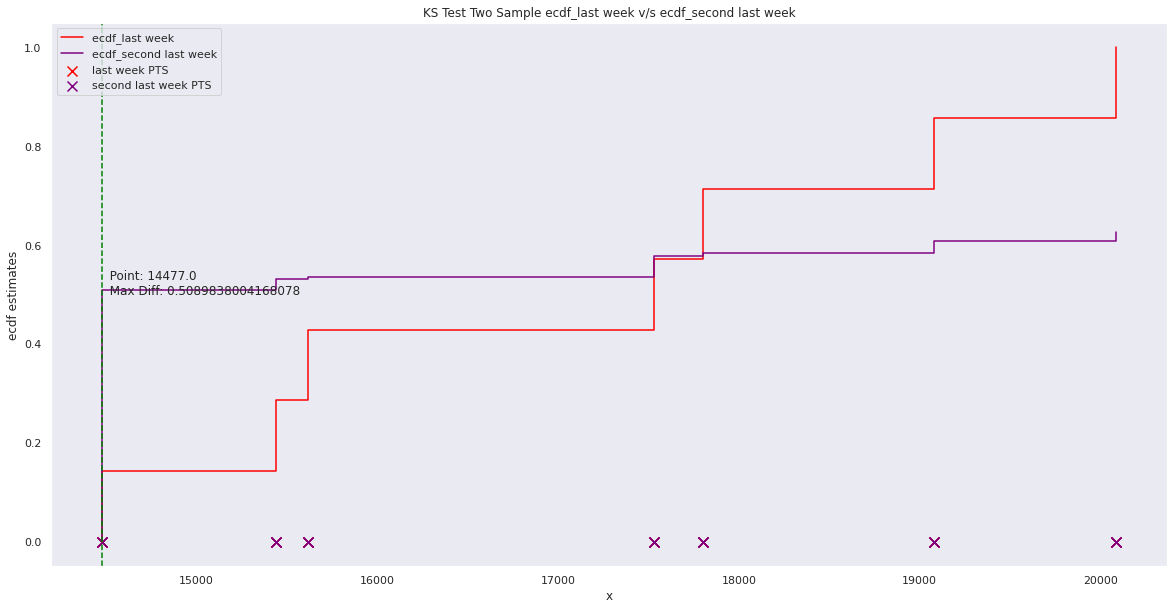

KS one sample test statistic for number of deaths:
For last week v/s second last week max difference is 0.42263081198641095 at point 764.0
Since 0.42263081198641095 is greater than C=0.05, we accept the Null hypothesis. Hence the distribution is the same


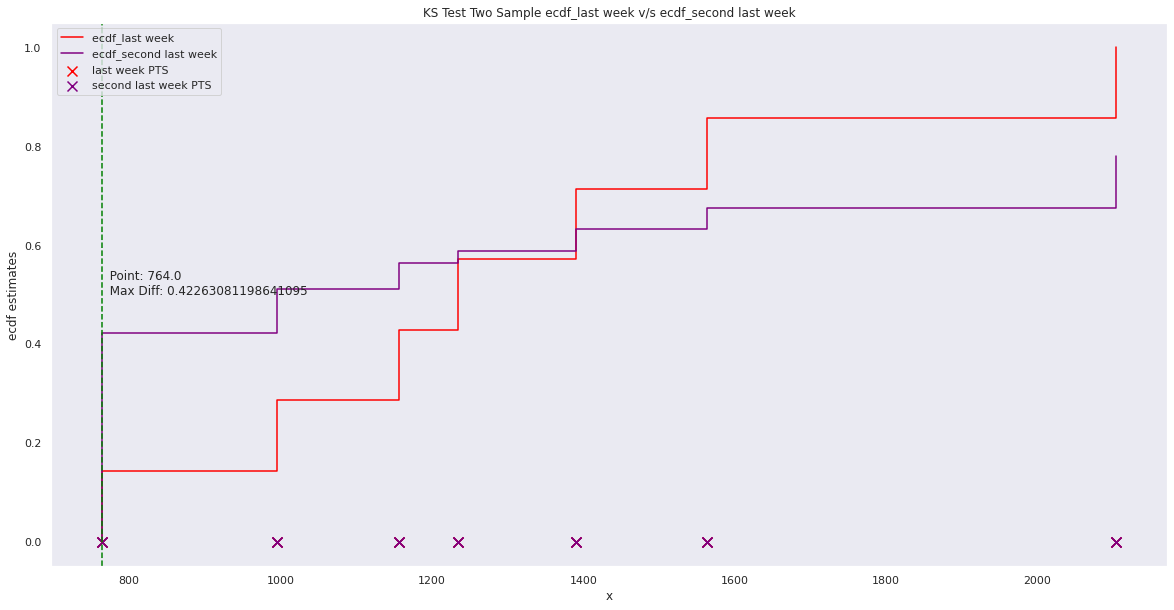

In [246]:
p_mme_deaths = 1/np.mean(second_last_week_deaths)
print(p_mme_deaths)
ecdf_geom_deaths = geom.cdf(last_week_deaths,p_mme_deaths)
print(ecdf_geom_deaths)
p_mme_cases = 1/np.mean(second_last_week_cases)
print(p_mme_cases)
ecdf_geom_cases = geom.cdf(last_week_cases,p_mme_cases)
print(ecdf_geom_cases)
ks_one_sample_test(last_week_cases, ecdf_geom_cases, "KS one sample test statistic for number of cases:")
ks_one_sample_test(last_week_deaths, ecdf_geom_deaths, "KS one sample test statistic for number of deaths:")

Since KS test does not have any assumption, the test is applicable for this scenario.

KS one sample test statistic for number of cases:
For last week v/s second last week max difference is 0.5089838004168078 at point 14477.0
Since 0.5089838004168078 is greater than C=0.05, we accept the Null hypothesis. Hence the distribution is the same

KS one sample test statistic for number of deaths:
For last week v/s second last week max difference is 0.42263081198641095 at point 764.0
Since 0.42263081198641095 is greater than C=0.05, we accept the Null hypothesis. Hence the distribution is the same

#### KS for Binomial : 

In [247]:
n = len(second_last_week_cases)
e_x = sum(second_last_week_cases)/n
#n_bin * p_bin = e_x
e_x_sq = sum([x**2 for x in second_last_week_cases])/len(second_last_week_cases)
var = e_x_sq  - e_x**2
r_bin = var/e_x
p_bin = 1 - r_bin
n_bin = e_x/p_bin
print(n_bin, p_bin)


-101.97906431094269 -199.58998582237382


Since we are getting invalid (-101.97906431094269, -199.58998582237382) values for n, p resp. Our distribution doesn't seem to follow the binomial distribution and hence we cannot apply the KS test assuming that the distribution is binomial

## Required Inference 4

4. Report the Pearson correlation value for #deaths and your X dataset, and also for #cases and your X dataset over one month of data. Use the most relevant column in X to compare against the covid numbers.


Extracting the cleaned data and aggregating it based on the 'date' column and agrregating it
to get total cases over all the regions on a particular date

In [248]:
covidData=pd.read_csv('data.csv')
covidData['date']= pd.to_datetime(covidData['date'], format='%Y%m%d')
covidgrp=covidData.groupby('date')
covidaggr=covidgrp.agg({"positiveIncrease":['sum'],"deathIncrease":['sum']})
positivecolname=covidaggr.columns[0]
deathcolname=covidaggr.columns[1]
covidaggr[deathcolname]

date
2020-03-01       0.0
2020-03-02       0.0
2020-03-03       0.0
2020-03-04       0.0
2020-03-05       0.0
               ...  
2020-05-05    1563.0
2020-05-06    1390.0
2020-05-07    2104.0
2020-05-08    1156.0
2020-05-09    1235.0
Name: (deathIncrease, sum), Length: 70, dtype: float64

Extracting the XDataset and meging it with Covid Data based on the Date column (In the left table Date is index) 
Here the most relevant column is PCE Inflation

In [0]:

XData=pd.read_csv('xData.csv')
XData['DATE']='2020'+XData['DATE'].astype(str)
XData['DATE']= pd.to_datetime(XData['DATE'], format='%Y%m%d')
Merged_Data=pd.merge(covidaggr, XData, left_index=True, right_on='DATE')
#XData['PCE Inflation']


Computing the pearson correlation between two distributions. for computing the Expectations using the plugin estimators
i.e considering probability as 1/n

In [0]:
def compute_pc_coefficient(X,Y):
    n=len(X)
    X_mean=sum(X)/n
    Y_mean=sum(Y)/n
    num=0
    den_x=0
    den_y=0
    for i in range(n):
        num+=(X[i]-X_mean)*(Y[i]-Y_mean)
        den_x+=(X[i]-X_mean)**2
        den_y+=(Y[i]-Y_mean)**2
    den=np.sqrt(den_x*den_y)
    corr=num/den
    return corr

In [251]:
#Computing the Correlation between the #deaths(new) and X dataset most relevant column is PCE Inflation

#print(Merged_Data[deathcolname],Merged_Data['T10YIE'])
corr =compute_pc_coefficient(Merged_Data[deathcolname],Merged_Data['PCE Inflation'])
print("Pearson Correlation value  between #deaths and X dataset PCE Inflation is:\t",corr)

#Computing the Correlation between the #cases(new) and X dataset most relevant column is PCE Inflation

#print(Merged_Data[positivecolname],Merged_Data['T10YIE'])

corr =compute_pc_coefficient(Merged_Data[positivecolname],Merged_Data['PCE Inflation'])
print("Pearson Correlation value between #cases and X dataset PCE Inflation is:\t",corr)



Pearson Correlation value  between #deaths and X dataset PCE Inflation is:	 -0.8996261099728777
Pearson Correlation value between #cases and X dataset PCE Inflation is:	 -0.7444113082533089


As the correlation values corr<-0.5 in both the cases there is negetive correlation in both cases 
i.e, the increase in number of Deaths a day is correlated with decrease in the PCE Inflation value and similar 
in the second case.
In the first case  #deaths and X dataset PCE Inflation there is a very high negetive correlation

##Required Inference 5

5. Assume the daily deaths are Poisson distributed with parameter lambda. Assume an Exponential prior (with mean beta) on lambda. To find beta for the prior, equate the mean of the Exponential prior to that of the Poisson lambda_MME. That is, find the MME of lambda using the first week’s data, and equate this lambda to the mean of Exp(1/beta) to find beta for the prior. Use first week’s data to obtain the posterior for lambda via Bayesian inference. Now, use second week’s data to obtain the new posterior, using prior as posterior after week 1. Repeat till the end of week 4. Plot all posterior distributions on one graph. Report the MAP for all posteriors.


Extracting the cleaned data and aggregating it based on the 'date' column and agrregating it
to get total cases over all the regions on a particular date.

In [252]:
covidData=pd.read_csv('data.csv')
covidData['date']= pd.to_datetime(covidData['date'], format='%Y%m%d')
covidgrp=covidData.groupby('date')
covidaggr=covidgrp.agg({"positiveIncrease":['sum'],"deathIncrease":['sum']})
positivecolname=covidaggr.columns[0]
deathcolname=covidaggr.columns[1]
covidaggr

,positiveIncrease,deathIncrease
,sum,sum
date,,
2020-03-01,0.0,0.0
2020-03-02,9.0,0.0
2020-03-03,17.0,0.0
2020-03-04,18.0,0.0
2020-03-05,44.0,0.0
...,...,...
2020-05-05,14477.0,1563.0
2020-05-06,15440.0,1390.0


In [0]:
#using month data for the task i.e 4 weeks from start date 

start_date = "2020-04-10"
end_date = "2020-05-08"
condtns=covidaggr.index.to_series().between(start_date,end_date)
filtered_data=covidaggr.loc[condtns]

In [254]:
#generating weekly data for 4 weeks

start = datetime.datetime.strptime(start_date, "%Y-%m-%d")
weekly_data=[]
for i in range(4):
    end = start + datetime.timedelta(days=6)
    wdata=covidaggr.loc[covidaggr.index.to_series().between(start,end)]
    weekly_data.append(wdata[deathcolname].to_list())
    start=end + datetime.timedelta(days=1)
weekly_data


[[1861.0, 1721.0, 1390.0, 1363.0, 2091.0, 2037.0, 1910.0],
 [1806.0, 1524.0, 1160.0, 1258.0, 1920.0, 1641.0, 1708.0],
 [1493.0, 1441.0, 826.0, 1055.0, 1824.0, 1560.0, 1776.0],
 [1418.0, 1281.0, 995.0, 764.0, 1563.0, 1390.0, 2104.0]]

Given that the distribution of the data is poisson with param lambda and prior distribution of lambda as exponential.

On computing the posterior using the bayesian inference we got the distribution as Gamma distibution. On computing 
posterior distribution again by using computed posterior as a prior now we again got a Gamma distribution.

Also we know that exponential is a special caase of gamma distibution. So Gamma is conjugate prior for poisson distribution.

   So considering this our initial prior exp(1/B) which was ~ Gamma(a,b) where a=1 b=1/B  B is mean
   The posterior distribution we computed was ~ Gamma(x,y) where x= Sum(X_i)+a  ( for i-> 1 to n) and y= n+b   
   
   mean and variance of gamma distribution is given by     mu= x/y sig=x/y^2

In [0]:


def compute_bi_distribution(data,a,b):
    x=sum(data)+a
    y=len(data)+b
    return x,y

def set_plot(name):
    plt.figure(name)
    plt.xlabel('x')
    plt.ylabel('f(x=X) posterior ')
    plt.title('Bayesian Inference PDF ')

def plot_gamma(a,b,k):
    P = []
    start=(a/b)-4*np.sqrt(a/b**2)
    end=(a/b)+(a/b**2)
    X = np.arange(start,end,1)
    for i in X:
        y=gamma.pdf( a=a,x=i, scale=1/b)
        P.append(y)
    plt.plot(X, P,label="Iteration:"+str(k+1))



 Using first week’s data obtained the posterior for lambda via Bayesian inference and considering this posterior as new prior and using second week data computed new posterior. Repeated this process for 4 weeks.

R 	Mean 		Variance 	x 		y
1 	1767.5714 	252.4898 	12374.0000 	7.0006
2 	1670.7182 	119.3322 	23391.0000 	14.0006
3 	1588.8143 	75.6558 	33366.0000 	21.0006
4 	1531.4333 	54.6929 	42881.0000 	28.0006


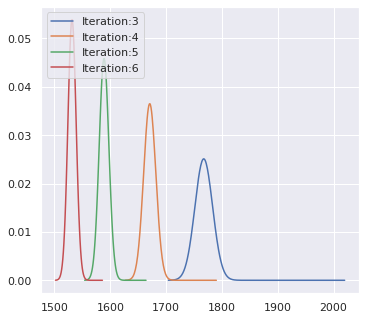

In [256]:
 
a=1
b=len(weekly_data[0])/(sum(weekly_data[0])+1)
print("R","\tMean","\t\tVariance" ,"\tx" , "\t\ty")
i=1
for data in weekly_data:
    x,y=compute_bi_distribution(data,a,b)
    print(i,"\t{:.4f}".format(x/y), "\t{:.4f}".format(x/y**2),"\t{:.4f}".format(x),"\t{:.4f}".format(y))
    a,b=x,y
    i+=1
    plot_gamma(x,y,i)
plt.legend(loc="upper left")

## Sample Inferences


###4. Propose three new inferences for your dataset and solve them using tools learned in class. You will be graded on creativity/practicality of your inferences. For each inference you propose, provide a paragraph of text to explain why this inference is practical and useful. Also comment on the results of your inference, as appropriate. See “Sample inferences” section below for ideas. Only use tools/tests learned in class. This will be 30% of the project grade.


## Sample Inference 1


***1. (highly recommended) Use your X dataset to check if COVID19 had an impact on the X data. State your hypothesis clearly and determine the best tool (from among those learned in class) to apply to your hypotheses. Also check whether the tool/test is applicable or not. ***





> Our X dataset is the inflation data which represents the latest value that the market participants expect the inflation to be in the next 10 years on an average. We will be using the 'Inflation' column from our X dataset for this question. 

>To check if Covid 19 has had an impact on the inflation across United States, we will be using the inflation data from June 2019 to May 2020. 

>The data from June 2019 to December 2019 will be considered the before Covid 19 data and the data from January 2020 to May 2020 will be considered as the after Covid 19 data.

### Hypothesis


Our Hypothesis is as follows:
**Ho** : Null Hypothesis: Covid 19 has not had any impact on the inflation of United States.
**H1** : Covid 19 has had an impact on the inflation of United States.

**The Null Hypothesis is that it hasn't had an impact because that would be the default state of things in our case and which is why it is chosen as Ho.**

To determine the best tool to apply this Hypothesis we need to look at the data. Since we don't have information about the distribution of our data, lets divide the data into 2 sets:

>Before Covid Data : September 2019 - December 2019

>After Covid Data : January 2020 - May 2020.

>According to our Hypothesis we are saying that the distribution of the data of before and after covid should be the same. And our H1 states that these two are distributed differently.




#### Best Tool to use:

The best test to use in our case would be the Permutation test. If indeed the Covid 19 has had an impact on the inflation in US, then if we move things around, we will observe a drop in the difference between the mean of the two sets.

This test is applicable in our case because our hypothesis states that the two distributions should be the same. Since we are talking about inflation it means that the average of the two sets should be similar if Covid has not impacted it. But if the hypothesis is false, and Covid 19 has had an impact on the inflation, then the inflation value should drop in the second set, thus dropping its mean.

P-test is applicable here because with different permutations of the test, we can discover if the values after December 2019 are indeed less than those before as the mean of the set will drop. Also, P-test has no assumptions on the data and hence we can apply it in our case.


### Permutation Test:

X : Inflation before covid
Y : Inflation after covid
N : Number of observations

Step 1 : Compute Tobs = |Mean of X - Mean of Y|

Step 2 : Permute X U Y in 900 different permutations to get Xi and Yi.

Step 3 : Compute Ti = |Mean of Xi - Mean of Yi| for the given permutations.

Step 4 : Calculate p-value

Step 5 : If p-value < 0.05, reject Null Hypothesis.



>Since we need only the inflation column in our case, we will use the original dataset which is not merged.

#### Datacleaning for this dataset:

In [0]:
pData = pd.read_csv('./T10YIEpTest.csv')
pData['DATE'] = pData['DATE'].str.replace('-','')
pData['DATE'] = pd.to_numeric(pData['DATE'])

#Filling in the missing values with the average of the past week.
def calcAvgInflation(date, data):
    val = 0.0
    total = 0
    for i in range(date-7, date):
        if(i in data['DATE'].values and pd.to_numeric(i)):
            x = data.loc[data['DATE'] == i].T10YIE.values[0]
            val+=pd.to_numeric(x)
            total+=1
#             print(x,val)
    if(val>0):
        val = val/total
    return val
  
for i in pData.iterrows():
    if (i[1]['T10YIE'] == '.'):
        pData.at[i[0], 'T10YIE'] = calcAvgInflation(i[1]['DATE'],pData)

#Segregating the data based on before Covid and after Covid
pData['T10YIE'] = pd.to_numeric(pData['T10YIE'])
pData = pData.loc[pData.DATE >= 20190901]
beforeC = pData.loc[pData.DATE <= 20191231]
afterC = pData.loc[pData.DATE > 20191231]
lenB = len(beforeC)
lenA = len(afterC)
pDataList = pData['T10YIE'].tolist()

#### Permutation Test:

In [258]:
# Permutation Test:

#Implementing the algorithm stated above
#Initializing the Tobs
Tobs = abs(beforeC.mean(axis = 0)['T10YIE'] - afterC.mean(axis = 0)['T10YIE'])
pValue = 0
#Getting 900 permutations of the data
for i in range(900):
    permData = np.random.permutation(pDataList)
    permB = permData[:lenB]
    permA = permData[lenB:]
    #Calculating the T for each permutation
    Tperm = abs(statistics.mean(permB) - statistics.mean(permA))
#     print(Tperm, Tobs)
    #Incrementing the p value if Tperm>Tobs
    if(Tperm > Tobs):
        pValue += 1

pValue = pValue/900
print('The p value calculated for the permutation Test is: ', pValue)
if(pValue < 0.05):
    print('The null hypothesis is Rejected as the p-value is < 0.05.')
    print('This means we accept H1 which states that : Covid 19 has had an impact on inflation in the US')
else:
    print('The null hypothesis is Accepted as the p-value is > 0.05.')
    print('This means we accept the null hypothesis which states that : Covid 19 has not had an impact on inflation in the US')

The p value calculated for the permutation Test is:  0.0
The null hypothesis is Rejected as the p-value is < 0.05.
This means we accept H1 which states that : Covid 19 has had an impact on inflation in the US


I had previously used 200 randomized permutations for the P-test and increased it by 100 till I reached 900. I observed that the p-value was stable and never changed. It was always 0.0.

>Thus by using permutation test, we conclude that COVID 19 has had an impact on inflation in the US.

## Sample Inference 2

2. (highly recommended) Check if COVID19 data changed after some local event or rule was enforced, like lockdown or stay-at-home, etc. For this, compare COVID19 data before and after the event. Maybe take into account that COVID19 takes some time to show symptoms, so maybe give some time to allow the lockdown to show its effects.

We have chosen two weeks for data for a date two weeks before the lockdown and two weeks of data one week after the lockdown to see if we see any effect of the lockdown on the number of cases and deaths. We used the Permutation, KS Test and Wald's test

In [259]:
covidData = pd.read_csv(r'./data.csv')
lockdown_date = 20200320

after_date = 20200327
before_lockdown=covidData[(covidData.date<=20200320) & (covidData.date>=20200306)]

print(len(before_lockdown))

after_lockdown=covidData[(covidData.date>=20200327) & (covidData.date<=20200410)]

print(len(after_lockdown))

481
480


In [260]:
(before_lockdown.positiveIncrease/before_lockdown.totalTestResultsIncrease).mean()

0.32667807606148686

In [261]:
(after_lockdown.positiveIncrease/after_lockdown.totalTestResultsIncrease).mean()

0.2242761812002825

In [262]:
before_lockdown[(before_lockdown.state=='NY') & (before_lockdown.totalTestResultsIncrease>0)].positiveIncrease/before_lockdown[(before_lockdown.state=='NY') & (before_lockdown.totalTestResultsIncrease>0)].totalTestResultsIncrease

1379    0.230259
1380    0.437828
1381    1.000000
1382    1.000000
1383    1.000000
1384    0.070885
1385    1.000000
1386    1.000000
1388    0.407407
1390    1.000000
1391    0.104114
1392    1.000000
1393    0.092274
1395    0.290841
dtype: float64

In [263]:
before_lockdown[(before_lockdown.state=='NY')].deathIncrease

1379     0.0
1380     0.0
1381     0.0
1382     0.0
1383     0.0
1384     0.0
1385     0.0
1386     0.0
1388     0.0
1389     0.0
1390     0.0
1391     3.0
1392     4.0
1393     5.0
1395    23.0
Name: deathIncrease, dtype: float64

In [264]:
after_lockdown[(after_lockdown.state=='NY')].deathIncrease

1400    134.0
1401    209.0
1407    237.0
1408    253.0
1413    332.0
1418    391.0
1420    432.0
1428    562.0
1429    594.0
1430    599.0
1432    630.0
1435    731.0
1438    777.0
1440    779.0
1442    799.0
Name: deathIncrease, dtype: float64

In [265]:
after_lockdown[(after_lockdown.state=='NY') & (after_lockdown.totalTestResultsIncrease>0)].positiveIncrease/after_lockdown[(after_lockdown.state=='NY') & (after_lockdown.totalTestResultsIncrease>0)].totalTestResultsIncrease

1400    0.311937
1401    0.754641
1407    0.438025
1408    0.495038
1413    0.496741
1418    0.504460
1420    0.479348
1428    0.486291
1429    0.446273
1430    0.467217
1432    0.469287
1435    0.424690
1438    0.401542
1440    0.416537
1442    0.402372
dtype: float64

In [266]:
before_lockdown[before_lockdown.state=='NY']

,Unnamed: 0,date,state,positive,negative,pending,death,total,totalTestResults,fips,deathIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
1379,2893,20200319,NY,4152.0,18132.0,0.0,12.0,22284,22284,36,0.0,5917.0,1770.0,7687.0
1380,3005,20200317,NY,1700.0,5506.0,0.0,7.0,7206,7206,36,0.0,963.0,750.0,1713.0
1381,3165,20200314,NY,524.0,2779.0,0.0,0.0,3303,3303,36,0.0,0.0,103.0,103.0
1382,3317,20200311,NY,216.0,92.0,0.0,0.0,308,308,36,0.0,0.0,43.0,43.0
1383,3517,20200307,NY,76.0,92.0,0.0,0.0,404,168,36,0.0,0.0,43.0,43.0
1384,3216,20200313,NY,421.0,2779.0,0.0,0.0,3200,3200,36,0.0,2687.0,205.0,2892.0
1385,3367,20200310,NY,173.0,92.0,0.0,0.0,265,265,36,0.0,0.0,31.0,31.0
1386,3467,20200308,NY,105.0,92.0,0.0,0.0,197,197,36,0.0,0.0,29.0,29.0
1388,3557,20200306,NY,33.0,92.0,0.0,0.0,361,125,36,0.0,16.0,11.0,27.0
1389,3267,20200312,NY,216.0,92.0,0.0,0.0,308,308,36,0.0,0.0,0.0,0.0


In [0]:
before_lockdown_list = list(before_lockdown[(before_lockdown.state=='NY') & (before_lockdown.totalTestResultsIncrease>0)].positiveIncrease/before_lockdown[(before_lockdown.state=='NY') & (before_lockdown.totalTestResultsIncrease>0)].totalTestResultsIncrease)
after_lockdown_list = list(after_lockdown[(after_lockdown.state=='NY') & (after_lockdown.totalTestResultsIncrease>0)].positiveIncrease/after_lockdown[(after_lockdown.state=='NY') & (after_lockdown.totalTestResultsIncrease>0)].totalTestResultsIncrease)
before_lockdown_death_list = list(before_lockdown[(before_lockdown.state=='NY')].deathIncrease)
after_lockdown_death_list = list(after_lockdown[(after_lockdown.state=='NY')].deathIncrease)

In [268]:
after_lockdown_list

[0.3119370797919574,
 0.7546409979373343,
 0.43802508218677705,
 0.4950382761553728,
 0.4967411048188909,
 0.5044603033006244,
 0.4793475255736798,
 0.4862908837856646,
 0.4462725762366686,
 0.46721709567751335,
 0.4692870438509155,
 0.42468956200966385,
 0.40154161603888217,
 0.41653715879657305,
 0.40237157145021973]

In [269]:
p_value = calculate_p_value(before_lockdown_list, after_lockdown_list, 20000)
print(p_value)
p_value = calculate_p_value(before_lockdown_death_list, after_lockdown_death_list, 20000)
print(p_value)

0.17635
0.0


For n=20000 before lockdown v/s after lockdown pvalue: 0.17845
Since 0.17845 is greater than 0.05, we accept the Null hypothesis. Hence the distribution is remain the same
For n=20000 last week v/s second last week pvalue: 0.0
Since 0.0 is less than 0.05, we reject the Null hypothesis. Hence the distribution isn't the same

KS two sample test statistic for before or after lockdown
For last week v/s second last week max difference is 0.4999999999999999 at point 0.7546409979373343
Since 0.4999999999999999 is greater than C=0.05, we accept the Null hypothesis. Hence the distribution is the same


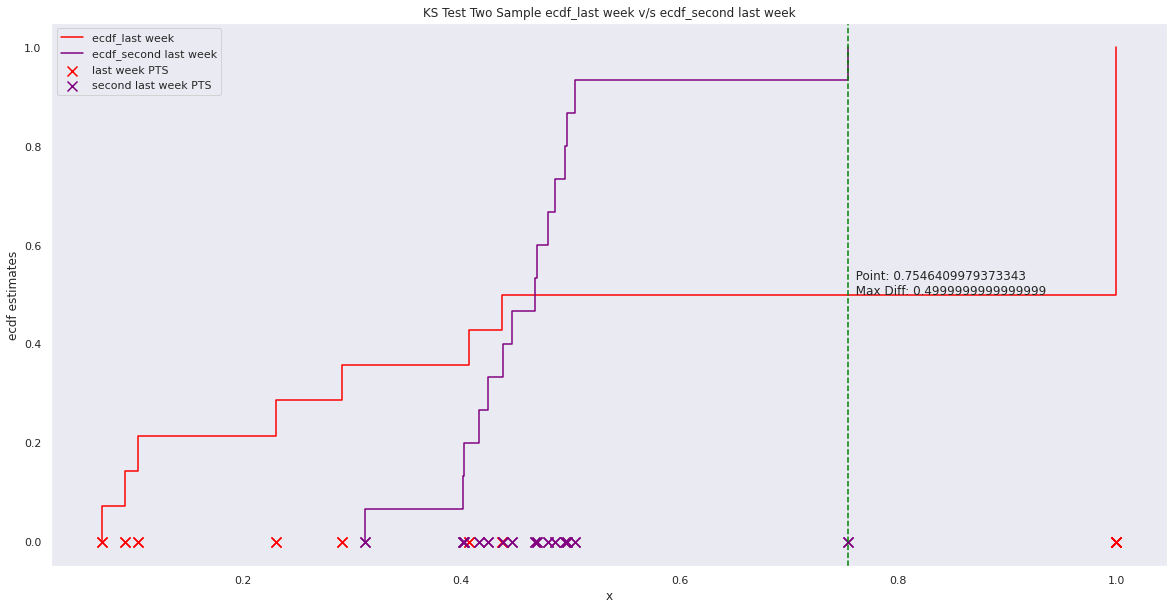

KS two sample test statistic for before or after lockdown
For last week v/s second last week max difference is 1.0 at point 134.0
Since 1.0 is greater than C=0.05, we accept the Null hypothesis. Hence the distribution is the same


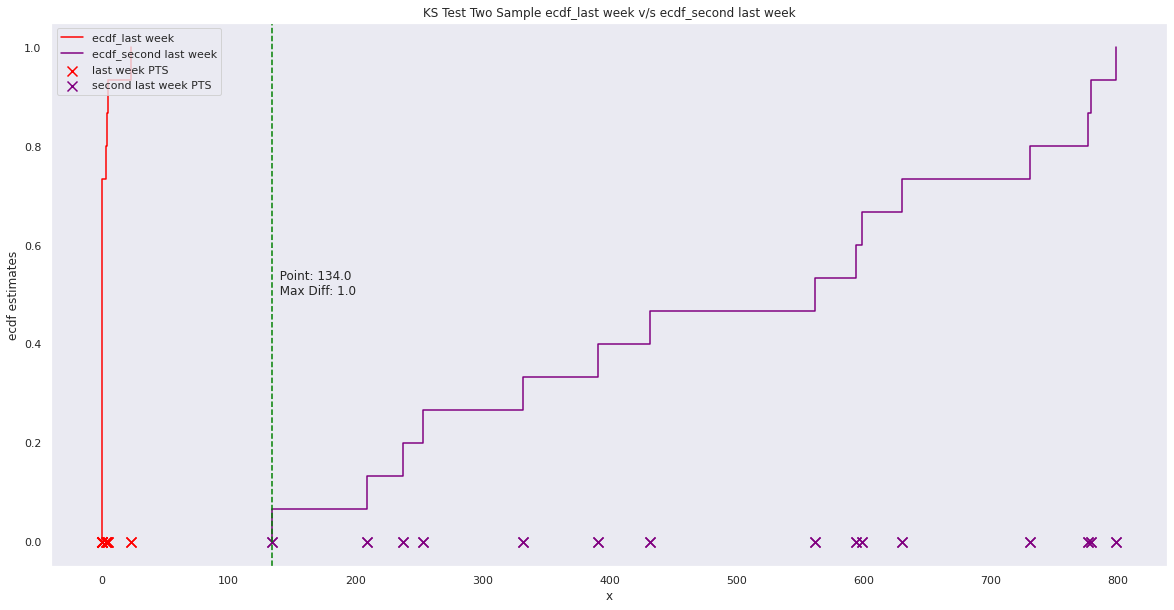

In [270]:
ks_two_sample_test(before_lockdown_list, after_lockdown_list, "KS two sample test statistic for before or after lockdown")
ks_two_sample_test(before_lockdown_death_list, after_lockdown_death_list, "KS two sample test statistic for before or after lockdown")

Since KS test does not have any assumption, the test is applicable for this scenario.

KS two sample test statistic for before or after lockdown
For before lockdown v/s after lockdown max difference is 0.4999999999999999 at point 0.7546409979373343
Since 0.4999999999999999 is greater than C=0.05, we accept the Null hypothesis. Hence the distribution is the same

KS two sample test statistic for before or after lockdown
For before lockdown v/s after lockdown max difference is 1.0 at point 134.0
Since 1.0 is greater than C=0.05, we accept the Null hypothesis. Hence the distribution is the same

In [271]:
### Wald's two sample test NY before and after lockdown

walds_two_sample_test(before_lockdown_list, after_lockdown_list, "Wald's two sample test statistic for cases before number of cases:")
walds_two_sample_test(before_lockdown_death_list, after_lockdown_death_list, "Wald's two sample test statistic for cases before number of cases:")

Wald's two sample test statistic for cases before number of cases: 1.3871714613133943
We accept the null hypothesis
Wald's two sample test statistic for cases before number of cases: 8.685314862500697
We reject the null hypothesis


For Wald's one sample test to be applicable the estimator need to be Asymptotically Normal

Since we are using MLE estimator which is Asymptotically Normal the Wald's one sample test is applicable

It can be concluded that as for  number of cases |W|= 1.3871714613133943 < 1.96 threshold, we accept the null hypothesis -> mean for before lockdown was implemented = mean of after lockdown was implemented(mu0).

For number of deaths as well, |W| = 8.685314862500697 > 1.96, hence we reject the null hypothesis

Conclusion

Number of cases before v/s after the lockdown:

We got excellent result as all three of the test i.e. Wald's, Permutation and KS test were accepting the null hypothesis. That is we can say with confidence that the lockdown helped keep the growth in check and the number of cases was sort of stabilized despite the increase in the number of test conducted.

Death count before v/s after the lockdown:

We can say that the 
We did not get any concrete result with respect to the death count before and after the lockdown as Wald's Test and Permutation test were rejecting the NUll hypothesis that the distribution was same, whereas the KS test is accepting it.

## Sample Inference 4
Use Chi-square independence test to check if COVID19 impacted your X dataset in some way.

As chi2 test can be applied on the categorical data we are categorizing the data into pre and post Covid19
and the most relevant column here PCE Inflation is being converted into categorical data by convering data 
into bins.


In [272]:
XData=pd.read_csv('xPrePostCovid.csv')
# binning th data in to bins 

min_value=np.floor(min(XData['Core PCE Inflation']))
max_value=np.ceil(max(XData['Core PCE Inflation']))
print(min_value,max_value)
bins=2
bin_width=(max_value-min_value)/bins
data_bins_pre=[]
data_bins_post=[]
for i in range(bins):
    data_bins_pre.append(0)
    data_bins_post.append(0)
for x in range(XData.shape[0]):
    d=XData['Core PCE Inflation'][x]
    bin_id=int(np.floor((d-min_value)/bin_width))
    #print(bin_id)
    if(XData['type'][x]=='pre'):
        data_bins_pre[bin_id]+=1
    else:
        data_bins_post[bin_id]+=1

level_totals=[]

pre_total=0
post_total=0
for l in range(bins):
    level_totals.append(data_bins_pre[l]+data_bins_post[l])
    pre_total+=data_bins_pre[l]
    post_total+=data_bins_post[l]

total=pre_total+post_total


1.0 2.0


In [273]:
#printing Chi Square observed value, matrix
def print_totals( attr1, attr2, totl):
    for i in range(bins):
        print("\t\tlevel",i,end =" ")
    print("\tTotal")
    print("Pre Covid",end =" ")
    for i in attr1:
        print("\t",i,end ="\t\t")
    print(pre_total)
    print("Post Covid",end =" ")
    for i in attr2:
        print("\t",i,end ="\t\t")
    print(post_total)
    print()
    print("Total\t",end =" ")
    for i in totl:
        print("\t",i,end ="\t\t")

    print(total)

print("Chi2 test values")
print("Observed values")
print_totals(data_bins_pre,data_bins_post,level_totals)
print(level_totals)

Chi2 test values
Observed values
		level 0 		level 1 	Total
Pre Covid 	 17			 0		17
Post Covid 	 21			 6		27

Total	 	 38			 6		44
[38, 6]


Generating the Expected values for the give setting for the analysis of the Covid Data

In [274]:
pre_expected_values=[]
post_expected_values=[]

for lt in level_totals:
    pre_expected_values.append(pre_total* lt/total)
    post_expected_values.append(post_total* lt/total)
print("Pre covid Expected values",pre_expected_values)

print("post covid expected values",post_expected_values)
Q_stat=0
for i in range(bins):
    Q_stat+= ((pre_expected_values[i]-data_bins_pre[i])**2)/pre_expected_values[i]
    Q_stat+= ((post_expected_values[i]-data_bins_post[i])**2)/post_expected_values[i]
    
print("Q_stat_value ",Q_stat)
print("P value ",1 - chi2.cdf(Q_stat, bins-1))


Pre covid Expected values [14.681818181818182, 2.3181818181818183]
post covid expected values [23.318181818181817, 3.6818181818181817]
Q_stat_value  4.374269005847953
P value  0.03648547671438307


From this p value << 0.5 so the Covid19 has impacted the Core PCE Inflation
So Core PCE Inflation is dependant on Pre and post covid changes